How to read this Notebook?
* Any text in <span style='color:green'>Green</span> indicate Task questions.
* Any text in <span style='color:Purple'>Purple</span> indicate the beginning of a summary.
* The Analysis is split into 2 main parts Step1: Studying the Data and perpair the Dataframe and Step2: Asking Questions.
* Text written in markdown cells are written to mark findings and methods implemended during the analysis.
* #comments are made in code to explain code structure.
* insights and Limitation of dataset is provided at the end to further clarify any doubts.(Optional)

## BEMM458 Final assessment


You have been hired to work with a team of executives for a company that make plastics and sell them to a number of clients. These executives are worried that public perception of plastic waste may cause the companies buying bottles and other plastic products from them to go to another manufacturer.

In this coursework you will be given a twitter dataset in which plastic waste as well as waste from these client companies is being tweeted about. You will be analysing it to understand the public perception of these companies and plastic waste more generally.

Because you are working with a team of executives you need to balance two competing demands, (1) you need to be able to justify everything you say in case you are questioned on it and (2) you need to be able to justify everything you say just in case they question you on it.

Because you are working at an executive level the questions have been deliberately made very open ended, to give you space to take the initiative. As you are in the early part of your journey as business analysts, some suggestions have been made for most of the questions – but you do not have to follow them, and I will mark creative or original thinking well. 

Because you are working at an executive level, and executives do not have much time you need to be brief. I’ve left a markdown cell at the top of every question where in less than 100 words you are to summarize your key findings from the questions.
In the cells below that, put all your code, as well as explanations of what your code is doing and why you are choosing to put one piece of information rather than another in the 100-word summary. 

In some cases, you will be asked why you made certain choices in previous questions.  In that case, just right a brief 100 word summary of your reasons.
Don’t stress about summarizing your work too much – using summaries will help you to get good marks on big open-ended questions because they make sure that the marker sees what you think is important.

Some of these questions are genuinely hard, but they are all being marked with equal weighting. If you find yourself stuck read through your class notes or watch class videos and online tutorials. You will be able to do everything that's being asked of you if you put the time in.


In [1]:
#set everything up
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pd.options.display.max_colwidth = 400

C:\Users\ACER\AppData\Local\Temp\ipykernel_14916\2237097849.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#read in the data 
ConversationsLean=pd.read_csv('https://raw.githubusercontent.com/thousandoaks/BEMM458_OLD/master/data/ConversationsLean.csv')
ConversationsLean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   447 non-null    int64  
 1   tweet.created_at             447 non-null    object 
 2   tweet.id                     447 non-null    float64
 3   tweet.full_text              447 non-null    object 
 4   tweet.entities               447 non-null    object 
 5   tweet.user.id                447 non-null    int64  
 6   tweet.user.screen_name       447 non-null    object 
 7   tweet.user.followers_count   447 non-null    int64  
 8   tweet.user.friends_count     447 non-null    int64  
 9   tweet.user.favourites_count  447 non-null    int64  
 10  tweet.user.statuses_count    447 non-null    int64  
 11  tweet.retweet_count          447 non-null    float64
 12  tweet.favorite_count         447 non-null    float64
 13  tweet.favorited     

In [3]:
pd.set_option('display.max_columns', None) #to view all the columns 
pd.set_option('display.max_rows', None) #to view all the rows
ConversationsLean

Unnamed: 0            tweet.created_at      tweet.id  \
0             0  2019-03-05 00:55:05.000000  1.102734e+18   
1             1  2018-10-04 17:01:10.000000  1.047894e+18   
2             2  2018-10-04 14:33:54.000000  1.047857e+18   
3             3  2018-08-16 21:20:06.000000  1.030203e+18   
4             4  2018-03-28 21:35:09.000000  9.791097e+17   
5             5  2019-11-15 10:34:38.000000  1.195289e+18   
6             6  2019-10-23 13:48:01.000000  1.187003e+18   
7             7  2019-10-21 09:46:02.000000  1.186217e+18   
8             8  2019-10-16 08:42:00.000000  1.184389e+18   
9             9  2019-09-02 09:32:01.000000  1.168457e+18   
10           10  2019-08-29 10:16:01.000000  1.167018e+18   
11           11  2019-08-28 11:43:01.000000  1.166678e+18   
12           12  2019-08-23 08:43:01.000000  1.164820e+18   
13           13  2019-08-13 13:52:01.000000  1.161274e+18   
14           14  2019-07-18 11:13:01.000000  1.151812e+18   
15           15  2019-07-18 09:45:01.000000  1.151790e+18   
16           16  2019-07-02 13:12:02.000000  1.146044e+18   
17           17  2019-02-20 10:29:41.000000  1.098168e+18   
18           18  2019-02-05 14:05:03.000000  1.092786e+18   
19           19  2019-02-05 10:01:01.000000  1.092725e+18   
20           20  2018-11-19 10:23:54.000000  1.064464e+18   
21           21  2018-11-15 17:37:26.000000  1.063124e+18   
22           22  2018-09-10 09:25:40.000000  1.039082e+18   
23           23  2018-02-27 10:40:26.000000  9.684357e+17   
24           24  2018-02-22 19:27:36.000000  9.667564e+17   
25           25  2018-11-15 18:29:02.000000  1.063137e+18   
26           26  2018-11-05 18:44:59.000000  1.059517e+18   
27           27  2018-10-19 17:10:06.000000  1.053332e+18   
28           28  2017-06-14 17:05:25.000000  8.750365e+17   
29           29  2016-11-04 18:21:28.000000  7.946055e+17   
30           30  2016-01-22 18:01:54.000000  6.905953e+17   
31           31  2013-05-22 19:56:17.000000  3.372959e+17   
32           32  2011-03-16 23:29:08.000000  4.816392e+16   
33           33  2018-10-06 11:35:52.000000  1.048537e+18   
34           34  2018-10-05 07:01:05.000000  1.048106e+18   
35           35  2011-12-23 14:14:59.000000  1.502178e+17   
36           36  2019-01-13 13:49:42.000000  1.084447e+18   
37           37  2016-12-13 20:48:10.000000  8.087755e+17   
38           38  2019-12-27 19:12:43.000000  1.210640e+18   
39           39  2019-11-21 23:20:10.000000  1.197656e+18   
40           40  2019-11-15 21:02:38.000000  1.195447e+18   
41           41  2019-11-15 21:02:26.000000  1.195447e+18   
42           42  2019-10-29 14:34:00.000000  1.189189e+18   
43           43  2019-03-29 08:05:04.000000  1.111540e+18   
44           44  2019-02-04 18:22:07.000000  1.092488e+18   
45           45  2018-12-15 22:37:58.000000  1.074071e+18   
46            0  2019-12-26 00:35:03.000000  1.209996e+18   
47            1  2019-12-23 20:30:11.000000  1.209210e+18   
48            2  2019-12-22 14:50:05.000000  1.208762e+18   
49            3  2019-12-19 14:15:10.000000  1.207666e+18   
50            4  2019-12-17 19:50:37.000000  1.207025e+18   
51            5  2019-12-07 00:45:04.000000  1.203113e+18   
52            6  2019-12-06 00:55:04.000000  1.202753e+18   
53            7  2019-12-02 15:07:06.000000  1.201518e+18   
54            8  2019-11-29 18:56:32.000000  1.200489e+18   
55            9  2019-11-25 21:55:54.000000  1.199084e+18   
56           10  2019-11-22 17:47:53.000000  1.197935e+18   
57           11  2019-11-18 20:25:05.000000  1.196525e+18   
58           12  2019-11-15 14:59:01.000000  1.195356e+18   
59           13  2019-11-14 20:05:08.000000  1.195070e+18   
60           14  2019-11-08 01:00:35.000000  1.192608e+18   
61           15  2019-11-06 19:30:13.000000  1.192162e+18   
62           16  2019-11-05 19:45:11.000000  1.191804e+18   
63           17  2019-10-23 18:35:04.000000  1.187075e+18   
64           18  2019-10-23 12:02:26.000

In [4]:
ConversationsLean.groupby('stakeholder').count() #count of tweets made by stakeholders

Unnamed: 0  tweet.created_at  tweet.id  tweet.full_text  \
stakeholder                                                                 
Artist                   104               104       104              104   
Multinational             20                20        20               20   
NGO                      241               241       241              241   
OtherInstitution          51                51        51               51   
Scientific                24                24        24               24   

                  tweet.entities  tweet.user.id  tweet.user.screen_name  \
stakeholder                                                               
Artist                       104            104                     104   
Multinational                 20             20                      20   
NGO                          241            241                     241   
OtherInstitution              51             51                      51   
Scientific                    24             24                      24   

                  tweet.user.followers_count  tweet.user.friends_count  \
stakeholder                                                              
Artist                                   104                       104   
Multinational                             20                        20   
NGO                                      241                       241   
OtherInstitution                          51                        51   
Scientific                                24                        24   

                  tweet.user.favourites_count  tweet.user.statuses_count  \
stakeholder                                                                
Artist                                    104                        104   
Multinational                              20                         20   
NGO                                       241                        241   
OtherInstitution                           51                         51   
Scientific                                 24                         24   

                  tweet.retweet_count  tweet.favorite_count  tweet.favorited  \
stakeholder                                                                    
Artist                            104                   104              104   
Multinational                      20                    20               20   
NGO                               241                   241              241   
OtherInstitution                   51                    51               51   
Scientific                         24                    24               24   

                  tweet.retweeted  tweet.lang  fetchedAt  \
stakeholder                                                
Artist                        104         104        104   
Multinational                  20          20         20   
NGO                           241         241        241   
OtherInstitution               51          51         51   
Scientific                     24          24         24   

                  tweet.full_text_clean  anger  fear  joy  love  sadness  \
stakeholder                                                                
Artist                              104    104   104  104   104      104   
Multinational                        20     20    20   20    20       20   
NGO                                 241    241   241  241   241      241   
OtherInstitution                     51     51    51   51    51       51   
Scientific                           24     24    24   24    24       24   

                  trust  identity_hate  insult  obscene  severe_toxic  threat  \
stakeholder                                                                     
Artist              104            104     104      104           104     104   
Multinational        20             20      20       20            20      20   
NGO                 241            241     241      241      

The dataset you have been given contains 30 columns:
* Columns 0-17 of the data includes data from twitter.
* Columns 18-29 are based on a NLP processing of the tweets, which attempts to gauge the tweets emotion.
* Column 30 tells us what kind of account the tweet comes from.


In [5]:
ConversationsLean.groupby('tweet.user.screen_name').count() #count of tweets made by Individual users

Unnamed: 0  tweet.created_at  tweet.id  \
tweet.user.screen_name                                           
5gyres                          59                59        59   
AdvScientists                    2                 2         2   
Algalita                        14                14        14   
AnnaTurns                        1                 1         1   
DRussoInnovate                  27                27        27   
EndPlasticWaste                  5                 5         5   
EnvirHealthNews                  3                 3         3   
FlotsamWeaving                   1                 1         1   
GordonJMillar                    1                 1         1   
Greenpeace                      22                22        22   
HealTheBay                       4                 4         4   
Maqueda                          4                 4         4   
MaxLiboiron                      4                 4         4   
Nestle                          12                12        12   
NoPlasticStraws                 20                20        20   
NonToxicRev                      4                 4         4   
PepsiCo                          4                 4         4   
PlasticOceansUS                  3                 3         3   
PlasticPollutes                127               127       127   
PlasticfreeBeth                 69                69        69   
SongsofJBrowne                   1                 1         1   
Unilever                         4                 4         4   
WRAP_UK                         46                46        46   
bahaplasmvmnt                    1                 1         1   
captainplanetfd                  4                 4         4   
celinecousteau                   1                 1         1   
driftersproject                  2                 2         2   
janettewallis                    2                 2         2   

                        tweet.full_text  tweet.entities  tweet.user.id  \
tweet.user.screen_name                                                   
5gyres                               59              59             59   
AdvScientists                         2               2              2   
Algalita                             14              14             14   
AnnaTurns                             1               1              1   
DRussoInnovate                       27              27             27   
EndPlasticWaste                       5               5              5   
EnvirHealthNews                       3               3              3   
FlotsamWeaving                        1               1              1   
GordonJMillar                         1               1              1   
Greenpeace                           22              22             22   
HealTheBay                            4               4              4   
Maqueda                               4               4              4   
MaxLiboiron                           4               4              4   
Nestle                               12              12             12   
NoPlasticStraws                      20              20             20   
NonToxicRev                           4               4              4   
PepsiCo                               4               4              4   
PlasticOceansUS                       3               3              3   
PlasticPollutes                     127             127            127   
PlasticfreeBeth                      69              69             69   
SongsofJBrowne                        1               1              1   
Unilever                              4               4              4   
WRAP_UK                              46              46             46   
bahaplasmvmnt                         1               1              1   
captainplanetfd                       4               4              4   
celinecousteau                        1      

#### <span style='color:green'>Task 1. Look for relationships in the numerical columns that have tweet in the title.  Based on your understanding of the data relationships and intuitions about twitter try to define a numerical measure of impact. 
- Try visualizing plots of the distribution of the values in numerical columns, and plotting the relationships between the values of pairs of collumns.
- Which numerical columns correlate with each other? 
- What kind of correlations do they have?
- If two features are strongly correlated they might not both be necessary in your measure of impact. 
- A measure of impact may be as simple as the number of times a tweet has been liked or retweeted or it may be as complex as a function that takes the inputs of those columns and outputs a scalar or a vector.


<b>summary:

<span style="color:Purple">From studying the Data and understanding relationship between the Data we have found the following insights: </span>

> + Most tweet emotions show relation between each other (eg:if a tweet has high score for love the score of joy also increases while score of fear is minimal). Based on this we can group emotions together to form 3 groups [positve,negative,really_negative]. We can refer these emotion score groups later to analyze tweets general emotion.

> + Understanding how twitter works we know that the amount of followers & Friends influences the chances of the users tweet appearing in someone elses feed. This is one main reason we should consider the Popularity parameter. Users that are more popular has a higher chance of circulating the Tweet between a wider audience. 

> + We cant say that Retweet & Favorites are always directly proportional. There might be cases when a post can get Retweeted more but not at all favoraited. These may be tweets that generally spark a lot of attention over a hot topic and gets circulated around however, people may not want to favoraite and revisit such tweets. Because of the coexistance of such tweets we cannot define one prime value of impact derived from Retweets and Favorites and hence we consider both of them as independent values of Impact. 

> + Hashtags and Mentions are Prime factors in Tweet Engagement. Combination of both can be observed in most tweets and can be considered for further analysis later on.

# Step 1 : Studying the Data and perpair the Dataframe

<span style="color:grey">(Here we will explore the data given and try understand relation between data to finally derive a new dataframe that can be used for further important analysis)</span>

<Figure size 864x720 with 0 Axes>

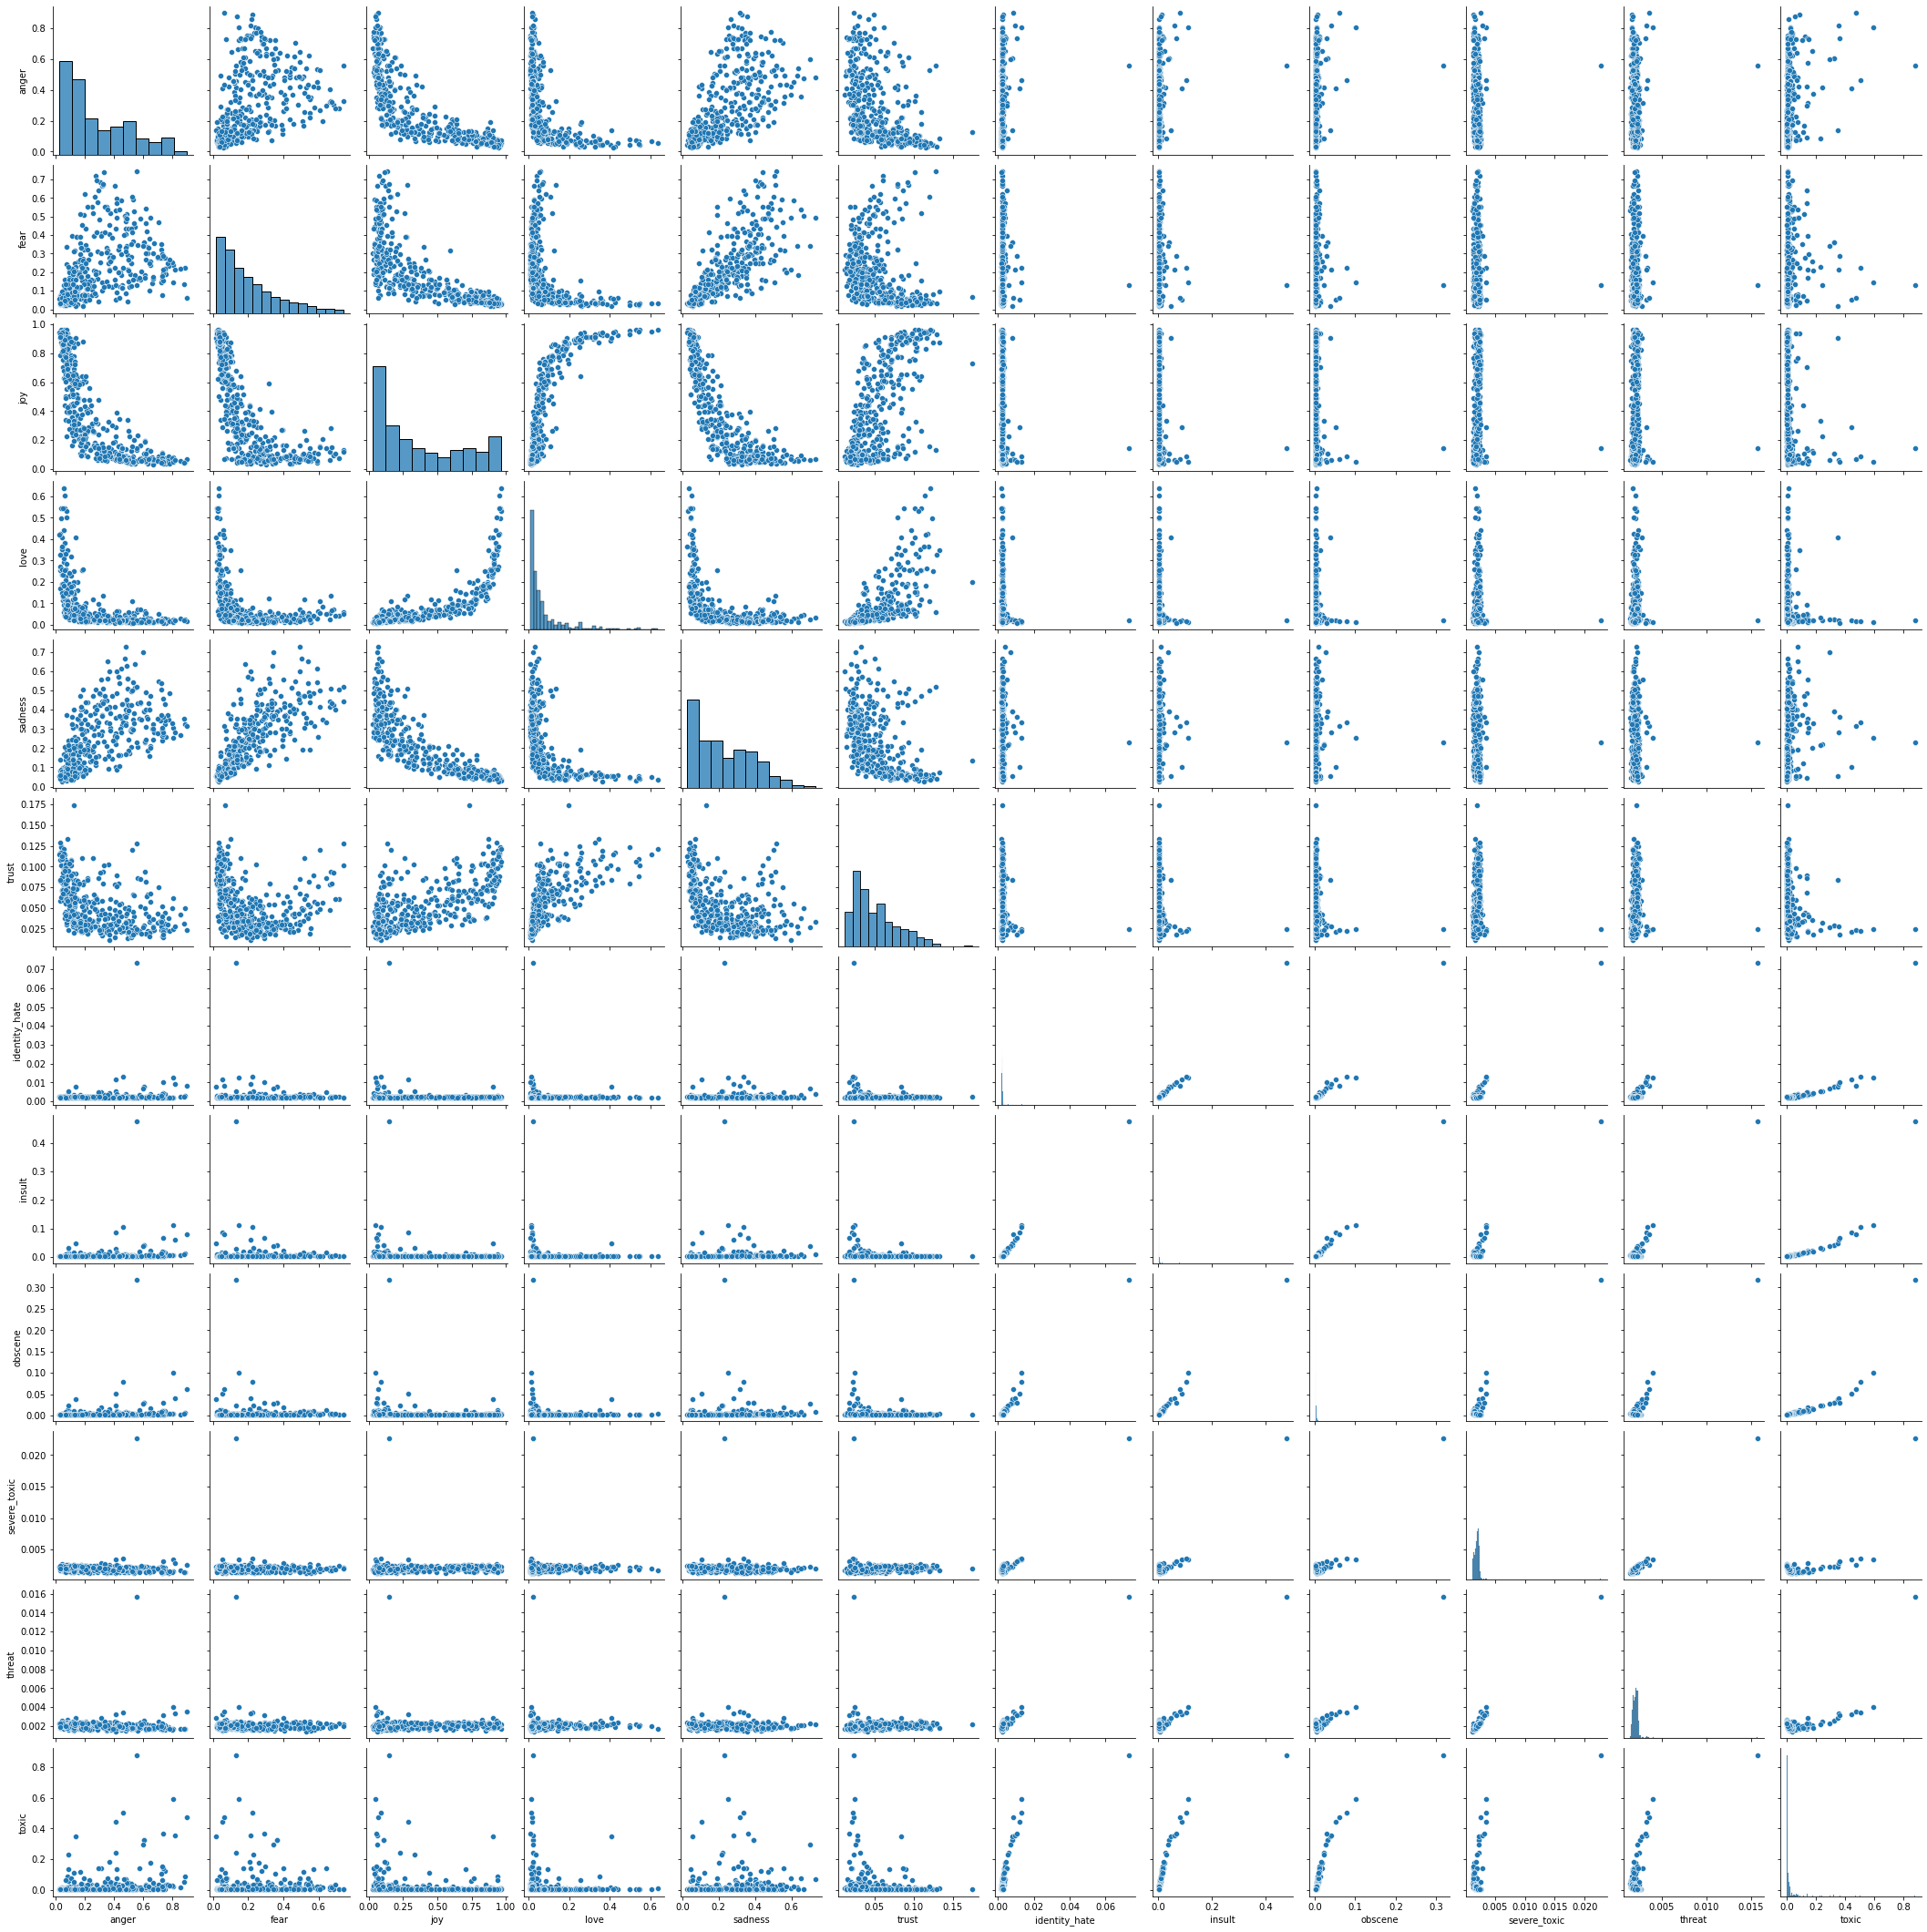

In [6]:
#exploratory data analysis on Tweet emotions 
plt.figure(figsize=(12,10))
sns.pairplot(data=ConversationsLean,x_vars=['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic'],y_vars=['anger','fear','joy','love','sadness','trust','identity_hate','insult','obscene','severe_toxic','threat','toxic'])

> From the above visualization we may try to identify the relation between several tweet emotions. for example lets take anger - if anger increases, love and joy decreases but fear and sadness tends to increase. Establishing such understanding from the patterns we can confirm what emotons are interconnected, enabling us to group such emotions together.

<b> the group will be : </b>
+ Positive [Love,Joy,Trust] 
+ Negative [Anger,Fear,Sadness]
+ Really Negative [Identity_hate,Insult,Obscene,Toxic,Threat,Severe_toxic]
    
 (Adding up all the values in each specific group will give us an idea of how emotions are distributed across every tweet.)

In [7]:
#lets create our 3 groups 
pos = ConversationsLean[['love','joy','trust']].sum(axis=1)
pos
neg = ConversationsLean[['anger','fear','sadness']].sum(axis=1)
neg
r_neg = ConversationsLean[['identity_hate','insult','obscene','threat','severe_toxic','toxic']].sum(axis=1)
r_neg
a=pd.DataFrame(pos,columns=['positive_score'])
b=pd.DataFrame(neg,columns=['negative_score'])
c=pd.DataFrame(r_neg,columns=['really_negative_score'])
temp = pd.merge(a, b, left_index=True, right_index=True)
score_table = pd.merge(temp, c, left_index=True, right_index=True) #create a datframe called 'score_table' used to hold all numerical measures of impact
score_table

positive_score  negative_score  really_negative_score
0          0.113830        0.909873               0.018082
1          0.079444        1.504956               0.017445
2          0.079444        1.504956               0.017445
3          0.100613        1.020654               0.024331
4          0.480962        0.494624               0.016049
5          0.836849        0.352268               0.016098
6          0.179397        0.749036               0.017164
7          0.279957        0.590589               0.016614
8          0.753044        0.237519               0.016356
9          0.299379        0.681880               0.016459
10         0.153593        1.048281               0.016588
11         0.094886        1.161851               0.018626
12         0.094886        1.161851               0.018626
13         0.094886        1.161851               0.018626
14         0.193263        0.778664               0.016375
15         0.259247        0.591583               0.016290
16         0.142831        1.229389               0.016270
17         0.463593        0.439892               0.016946
18         0.685592        0.297523               0.017604
19         0.802232        0.217395               0.023085
20         0.716891        0.265668               0.016597
21         0.702407        0.314121               0.016626
22         0.728722        0.339997               0.016682
23         0.817405        0.260026               0.017399
24         1.062682        0.208651               0.017168
25         0.390840        0.679593               0.022723
26         0.724719        0.410313               0.016655
27         1.141881        0.230747               0.016078
28         0.554682        0.478525               0.016292
29         0.954973        0.195165               0.016549
30         0.148507        1.176852               0.020340
31         0.101561        1.132434               0.017390
32         0.140014        1.233433               0.017513
33         0.073659        1.270982               0.016375
34         0.073659        1.270982               0.016375
35         0.513448        0.322627               0.018106
36         0.337906        0.748274               0.017538
37         0.114311        1.105952               0.029227
38         0.574880        0.425997               0.016425
39         0.794708        0.261159               0.016001
40         0.699040        0.286036               0.017074
41         0.692541        0.432993               0.018645
42         1.395019        0.160314               0.028596
43         0.858479        0.230652               0.015964
44         0.712371        0.338992               0.016756
45         1.097350        0.211655               0.017556
46         0.807307        0.279643               0.020952
47         0.209992        1.246694               0.017904
48         0.133047        1.207206               0.037814
49         0.521694        0.534189               0.024262
50         0.521694        0.534189               0.024262
51         0.117948        1.422218               0.018268
52         0.317672        1.819178               0.017579
53         0.123812        1.282783               0.017506
54         0.388950        0.932852               0.025454
55         0.352304        1.025378               0.027855
56         0.281248        0.805717               0.029150
57         0.091798        1.347048               0.032599
58         0.965934        0.344613               0.028533
59         0.351343        0.431727               0.016543
60         0.334402        0.468310               0.102539
61         0.304462        0.662935               0.016227
62         0.146556        1.246827               0.017360
63         0.170973        1.354021               0.038308
64         0.126411        1.438736               0.113411
65         0.330329        0.566969               0.600407
66         0.068649        1.200747               0.

> Based on the size of the dataset given it is difficult to understand the relation between user popularity and engagement rate. However, lets consider this based on real world scenario of how Twitter works. The Basic rule is that More the followers and friends the more chance of the users post being viewed by a wider range of audience. Lets consider this fact to define a Popularity parameter.  

In [8]:
#Lets determine Popularity for each user using by (followers or friends)/ (total followers or friends)
#we will do a loop approach while a groupby approach might also work
user_impact_df = ConversationsLean[['tweet.user.id','tweet.user.screen_name','tweet.user.followers_count','tweet.user.friends_count','tweet.user.favourites_count','tweet.user.statuses_count','stakeholder']]
print('\n',"no of unique users : ",user_impact_df['tweet.user.screen_name'].nunique())
sum_of_followers = 0
sum_of_friends = 0
popularity = []
for i in user_impact_df['tweet.user.screen_name'].unique(): #this loop is to calculate the sum of followers and friends based on each unique users
    value_followers = user_impact_df[user_impact_df['tweet.user.screen_name']==i]['tweet.user.followers_count'].mean() #the mean value is taken to balance out any diffrences in followers thoughout time as there are posts from various dates  
    value_friends = user_impact_df[user_impact_df['tweet.user.screen_name']==i]['tweet.user.friends_count'].mean()
    sum_of_followers += int(value_followers)
    sum_of_friends += int(value_friends)
print(f'total followers in dataset : {sum_of_followers}')
print(f'total friends in dataset : {sum_of_friends}')
for i in user_impact_df['tweet.user.screen_name'].unique(): #this loop is to calculate the popularity score for each users
    user_value_followers = user_impact_df[user_impact_df['tweet.user.screen_name']==i]['tweet.user.followers_count'].mean()
    user_value_friends = user_impact_df[user_impact_df['tweet.user.screen_name']==i]['tweet.user.friends_count'].mean()
    user_stakeholder = user_impact_df[user_impact_df['tweet.user.screen_name']==i]['stakeholder'].head(1).to_string()
    text = user_stakeholder.split()
    popularity.append((text[1],i,((int(user_value_followers)/sum_of_followers)*100)+((int(user_value_friends)/sum_of_friends)*100))) #popularity is measured as the sum of followers percentage and friends percentage 
user_popularity_df = pd.DataFrame(popularity,columns=['stakeholder','tweet.user.screen_name','Popularity'])  #we place our scores on this new dataframe
user_popularity_df


 no of unique users :  28
total followers in dataset : 3011394
total friends in dataset : 92085


stakeholder tweet.user.screen_name  Popularity
0                NGO        PlasticPollutes    8.687245
1                NGO                 5gyres    5.169070
2   OtherInstitution                WRAP_UK    3.119457
3         Scientific               Algalita    0.850962
4             Artist         DRussoInnovate    0.614510
5                NGO        captainplanetfd    2.731357
6                NGO        NoPlasticStraws    1.840580
7             Artist          GordonJMillar    0.626073
8                NaN            MaxLiboiron    3.511952
9                NaN        driftersproject    0.970435
10  OtherInstitution        EndPlasticWaste    0.414865
11     Multinational                 Nestle    9.370652
12     Multinational                PepsiCo   26.241780
13               NGO             Greenpeace   66.389620
14            Artist        PlasticfreeBeth    1.982096
15               NGO             HealTheBay   37.737520
16            Artist              AnnaTurns    2.297851
17            Artist                Maqueda    0.982357
18               NGO            NonToxicRev    0.859190
19               NGO          bahaplasmvmnt    0.258655
20        Scientific          AdvScientists    2.121015
21        Scientific        EnvirHealthNews    2.227335
22        Scientific        PlasticOceansUS    0.167697
23        Scientific          janettewallis    2.024791
24            Artist         celinecousteau    2.189765
25               NaN         FlotsamWeaving    3.588879
26     Multinational               Unilever   10.694068
27            Artist         SongsofJBrowne    2.330225

> Further Engagement is now mainly dependent on how Hashtags are used in each tweet. While considering Hashtags we should also check for user tags as this information might also come in handy. Lets try out a function inorder to select Hashtags and User tags from the 'tweet.full_text' column.

In [9]:
tags_data = pd.DataFrame(columns=['hash_tags','user_tags'])
def tag_finder(text):
    hash_tags = []
    tags = []
    for i in text.split():
        if i.startswith('#'):
            hash_tags.append(i)
        if i.startswith('@'):
            tags.append(i)
    return hash_tags, tags
tags_data['hash_tags'],tags_data['user_tags'] = zip(*ConversationsLean['tweet.full_text'].apply(tag_finder))
tags_data

hash_tags  \
0                                                     [#plasticpollutes, #recyclingisnottheanswer]   
1                                    [#recycling, #plasticpollution., #plastics, #plasticpollutes]   
2                                    [#recycling, #plasticpollution., #plastics, #plasticpollutes]   
3                                                                             [#reuse, #recycling]   
4                                                   [#recyclingisnotenough, #breakfreefromplastic]   
5                                [#plastic, #recycling, #UKPlasticsPact., #tech, #CircularEconomy]   
6                                             [#ukplasticspact, #changeplasticforgood, #recycling]   
7                                               [#plastic, #plastics, #recycling, #ukplasticspact]   
8                                                   [#plastics, #changeplasticforgood, #recycling]   
9                                                                           [#funding, #recycling]   
10                                                                          [#funding, #recycling]   
11                                                        [#recycling, #circulareconomy, #funding]   
12                                                        [#recycling, #circulareconomy, #funding]   
13                                                        [#recycling, #circulareconomy, #funding]   
14                                                          [#funding, #smallbusiness, #recycling]   
15                                                            [#funding, #recycling, #smebusiness]   
16                                                                  [#recycling., #UKPlasticsPact]   
17                                                                                    [#recycling]   
18                                             [#fibre2fibre, #recycling, #fibre2fibre, #SCAP2020]   
19                                                        [#fibre2fibre, #recycling, #fibre2fibre]   
20                                                                   [#recycling, #plasticsaction]   
21                                                                  [#UKPlasticsPact, #recycling.]   
22                                               [#recycling, #UKPlasticsPact., #plasticpollution]   
23                                                           [#plastic, #environment., #recycling]   
24                                                                          [#recycling, #plastic]   
25                                                              [#AmericaRecyclesDay!, #recycling]   
26                                                                                    [#recycling]   
27                                                                                    [#recycling]   
28                                                                                    [#recycling]   
29                                                                                   [#recycling.]   
30                                                                                    [#recycling]   
31                                                                                    [#recycling]   
32                                                                                    [#recycling]   
33                                                                                    [#recycling]   
34                                                                                    [#recycling]   
35                                                                       [#recycling, #packaging,]   
36                                                       [#breakfreefromplastic, #recyclingisnot…]   
37                                                                         [#plasticl, #recycling]   
38                                                                                    [#recycling]   
39       

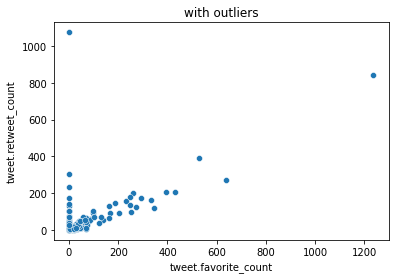

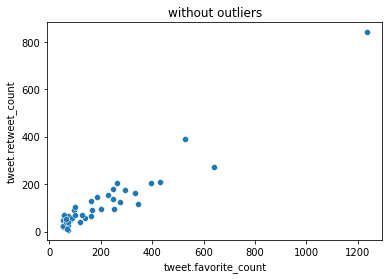

In [10]:
#exploritory analyisis on retweeted and favorated tweets
plt.title("with outliers")
plt.show(sns.scatterplot(x=ConversationsLean['tweet.favorite_count'],y=ConversationsLean['tweet.retweet_count']))
pattern_outliers = ConversationsLean[ConversationsLean['tweet.favorite_count']>50] # removes pattern outliers to show exact correlation 
plt.title("without outliers")
plt.show(sns.scatterplot(x=pattern_outliers['tweet.favorite_count'],y=ConversationsLean['tweet.retweet_count']))

In [11]:
pattern_outliers['tweet.favorite_count'].corr(ConversationsLean['tweet.retweet_count']) #correlation coiefficent shows how highly corelated these 2 variables are.

0.9602196575767545

> This plot shows an almost linear pattern and indicates a tweet performance based on retweets and favorites. However this is made by avoiding outliers (ones with high retweet but low favorites). Lets analyse these outliers and try to understannd them.

In [12]:
ConversationsLean[(ConversationsLean['tweet.favorite_count']<50) & (ConversationsLean['tweet.retweet_count']>150)].sort_values(by = "tweet.retweet_count",axis=0,ascending=False) #outlier pattern tweets

Unnamed: 0            tweet.created_at      tweet.id  \
102          56  2017-11-10 15:32:43.000000  9.290089e+17   
439          13  2016-05-13 02:54:51.000000  7.309544e+17   
93           47  2018-10-09 15:25:19.000000  1.049682e+18   
110          64  2019-11-19 21:33:06.000000  1.196904e+18   

                                                                                                                                  tweet.full_text  \
102  RT @MarkRuffalo: By 2050 there may be more plastic in the ocean than fish. Let’s stop single use plastic #BreakFreeFromPlastic #BFFPT https…   
439  RT @frandrescher: #DidYouKnow The average American uses 500-700 plastic bags every year. #Resolve2Refuse @plasticpollutes https://t.co/Qril…   
93   RT @brkfreeplastic: BREAKING: @CocaCola's branded plastic waste was found in 40 out of 42 countries in #breakfreefromplastic brand audits w…   
110  RT @greenpeaceusa: Humans have made 8.3bn tons of plastic since 1950, and most of it is still around us. #BreakFreeFromPlastic https://t.co…   

                                                                                                                                                                                                                                                                                                                                                                                                   tweet.entities  \
102                                                                                                                             {'hashtags': [{'text': 'BreakFreeFromPlastic', 'indices': [105, 126]}, {'text': 'BFFPT', 'indices': [127, 133]}], 'symbols': [], 'user_mentions': [{'screen_name': 'MarkRuffalo', 'name': 'Mark Ruffalo', 'id': 47285504, 'id_str': '47285504', 'indices': [3, 15]}], 'urls': []}   
439  {'hashtags': [{'text': 'DidYouKnow', 'indices': [18, 29]}, {'text': 'Resolve2Refuse', 'indices': [89, 104]}], 'symbols': [], 'user_mentions': [{'screen_name': 'frandrescher', 'name': 'Fran Drescher', 'id': 17371873, 'id_str': '17371873', 'indices': [3, 16]}, {'screen_name': 'PlasticPollutes', 'name': 'Plastic Pollutes', 'id': 71310291, 'id_str': '71310291', 'indices': [105, 121]}], 'urls': []}   
93                            {'hashtags': [{'text': 'breakfreefromplastic', 'indices': [103, 124]}], 'symbols': [], 'user_mentions': [{'screen_name': 'brkfreeplastic', 'name': 'breakfreefromplastic', 'id': 775875252555436032, 'id_str': '775875252555436032', 'indices': [3, 18]}, {'screen_name': 'CocaCola', 'name': 'Coca-Cola', 'id': 26787673, 'id_str': '26787673', 'indices': [30, 39]}], 'urls': []}   
110                                                                                                                                                                     {'hashtags': [{'text': 'BreakFreeFromPlastic', 'indices': [105, 126]}], 'symbols': [], 'user_mentions': [{'screen_name': 'greenpeaceusa', 'name': 'Greenpeace USA', 'id': 5360012, 'id_str': '5360012', 'indices': [3, 17]}], 'urls': []}   

     tweet.user.id tweet.user.screen_name  tweet.user.followers_count  \
102       71310291        PlasticPollutes                       45953   
439      541280211               Algalita                        2865   
93        71310291        PlasticPollutes                       45953   
110        3459051             Greenpeace                     1867284   

     tweet.user.friends_count  tweet.user.favourites_count  \
102                      6595                        13453   
439                       696                         1778   
93                       6595                        13453   
110                      4002                         8752   

     tweet.user.statuses_count  tweet.retweet_count  tweet.favorite_count  \
102                      18732               1074.0                   0.0   
439                       3096                302.0                   0.0   
93                 

> As we can see all these tweets have a common generally negative emotion expressed. So its possible that people tends to retweet to share/comment more about the tweet and how they feel about it, while avoiding to keep it in their favorites. With the posibility of such tweets we cannot take the coorelation values to determine a score for tweet publicity but to take retweet and favorites as 2 seperate values to consider in our analysis.

<b> Now lets combine all our created values and important measures of impact to further progress with our analysis </b>

In [13]:
main_df = ConversationsLean[['tweet.created_at','tweet.full_text','tweet.user.screen_name','tweet.retweet_count','tweet.favorite_count','tweet.lang','stakeholder']] #We are avoiding user_favorites and user_status count because we dont know the twitter engagement algorithm and how a post engagement is effected by these parameters.
user_popularity_df_modified = user_popularity_df.drop(['stakeholder'],axis=1)  #removing stakeholder column from pupularity dataframe for merging 
df_main_01 = pd.merge(main_df ,user_popularity_df_modified ,on=['tweet.user.screen_name','tweet.user.screen_name'],how='left') #combining popularity score with dataframe
df_main_02 = pd.merge(df_main_01,tags_data,left_index=True, right_index=True) #combining tags data with dataframe
main_df = pd.merge(df_main_02,score_table,left_index=True, right_index=True) #combining emotions score with dataframe
main_df #final dataframe to work with

tweet.created_at  \
0    2019-03-05 00:55:05.000000   
1    2018-10-04 17:01:10.000000   
2    2018-10-04 14:33:54.000000   
3    2018-08-16 21:20:06.000000   
4    2018-03-28 21:35:09.000000   
5    2019-11-15 10:34:38.000000   
6    2019-10-23 13:48:01.000000   
7    2019-10-21 09:46:02.000000   
8    2019-10-16 08:42:00.000000   
9    2019-09-02 09:32:01.000000   
10   2019-08-29 10:16:01.000000   
11   2019-08-28 11:43:01.000000   
12   2019-08-23 08:43:01.000000   
13   2019-08-13 13:52:01.000000   
14   2019-07-18 11:13:01.000000   
15   2019-07-18 09:45:01.000000   
16   2019-07-02 13:12:02.000000   
17   2019-02-20 10:29:41.000000   
18   2019-02-05 14:05:03.000000   
19   2019-02-05 10:01:01.000000   
20   2018-11-19 10:23:54.000000   
21   2018-11-15 17:37:26.000000   
22   2018-09-10 09:25:40.000000   
23   2018-02-27 10:40:26.000000   
24   2018-02-22 19:27:36.000000   
25   2018-11-15 18:29:02.000000   
26   2018-11-05 18:44:59.000000   
27   2018-10-19 17:10:06.000000   
28   2017-06-14 17:05:25.000000   
29   2016-11-04 18:21:28.000000   
30   2016-01-22 18:01:54.000000   
31   2013-05-22 19:56:17.000000   
32   2011-03-16 23:29:08.000000   
33   2018-10-06 11:35:52.000000   
34   2018-10-05 07:01:05.000000   
35   2011-12-23 14:14:59.000000   
36   2019-01-13 13:49:42.000000   
37   2016-12-13 20:48:10.000000   
38   2019-12-27 19:12:43.000000   
39   2019-11-21 23:20:10.000000   
40   2019-11-15 21:02:38.000000   
41   2019-11-15 21:02:26.000000   
42   2019-10-29 14:34:00.000000   
43   2019-03-29 08:05:04.000000   
44   2019-02-04 18:22:07.000000   
45   2018-12-15 22:37:58.000000   
46   2019-12-26 00:35:03.000000   
47   2019-12-23 20:30:11.000000   
48   2019-12-22 14:50:05.000000   
49   2019-12-19 14:15:10.000000   
50   2019-12-17 19:50:37.000000   
51   2019-12-07 00:45:04.000000   
52   2019-12-06 00:55:04.000000   
53   2019-12-02 15:07:06.000000   
54   2019-11-29 18:56:32.000000   
55   2019-11-25 21:55:54.000000   
56   2019-11-22 17:47:53.000000   
57   2019-11-18 20:25:05.000000   
58   2019-11-15 14:59:01.000000   
59   2019-11-14 20:05:08.000000   
60   2019-11-08 01:00:35.000000   
61   2019-11-06 19:30:13.000000   
62   2019-11-05 19:45:11.000000   
63   2019-10-23 18:35:04.000000   
64   2019-10-23 12:02:26.000000   
65   2019-10-19 13:10:05.000000   
66   2019-10-16 23:55:05.000000   
67   2019-09-21 00:05:04.000000   
68   2019-07-23 17:15:25.000000   
69   2019-07-23 15:02:52.000000   
70   2019-07-23 00:26:44.000000   
71   2019-07-04 23:55:03.000000   
72   2019-07-02 00:20:04.000000   
73   2019-06-30 18:02:42.000000   
74   2019-06-08 14:10:07.000000   
75   2019-05-27 00:20:05.000000   
76   2019-05-16 02:15:05.000000   
77   2019-04-27 20:40:06.000000   
78   2019-04-16 18:20:04.000000   
79   2019-04-14 00:05:04.000000   
80   2019-04-07 14:15:04.000000   
81   2019-04-02 22:55:04.000000   
82   2019-02-24 02:05:06.000000   
83   2019-01-16 17:10:43.000000   
84   2018-12-10 16:01:39.000000   
85   2018-11-03 00:00:32.000000   
86   2018-11-01 23:45:04.000000   
87   2018-11-01 14:20:09.000000   
88   2018-10-31 17:05:03.000000   
89   2018-10-16 21:39:39.000000   
90   2018-10-13 21:05:03.000000   
91   2018-10-09 20:45:21.000000   
92   2018-10-09 17:58:09.000000   
93   2018-10-09 15:25:19.000000   
94   2018-10-08 21:30:08.000000   
95   2018-09-21 18:01:28.000000   
96   2018-09-19 20:25:05.000000   
97   2018-09-01 02:32:30.000000   
98   2018-07-30 16:49:54.000000   
99   2018-07-11 20:53:38.000000   
100  2018-03-14 17:38:06.000000   
101  2018-03-06 16:40:35.000000   
102  2017-11-10 15:32:43.000000   
103  2017-10-31 17:57:44.000000   
104  2017-10-24 22:53:30.000000   
105  2019-12-24 19:01:06.000000   
106  2019-12-09 22:25:03.000000   
107  2019-12-07 22:25:07.000000   
108  2019-11-26 12:01:09.000000   
109  2019-11-25 14:10:06.000000   
110  2019-11-19 21:33:06.000000   
111  2019-11-09 16:10:04.000000   
112  2019-11-07 15:01:16.000000   
113  2019-10-25 01:15:03.

> Insted of considering a single measure of impact we have multiple measures that will help us anlyze our data for more insights.

#### <span style='color:green'>Task 2. Explore the impact of different individuals and groups 
	- what groups of stakeholders in the datasets have more impact
	-which users in the datasets have more impact


<b>summary:</b>

<span style="color:Purple">The Impact is calculated by 2 main factors - Impact based on Popularity & Impact based on Tweets performance, these 2 are applied to stakeholders as well as individual users to find the following insights : </span>

> + NGO's have the most impact in terms of Popularity and hence they may be able to circulate and grab attention to most of its tweets. Its followed by Multinational companies with the second most Popularity score.

> + 'Greenpeace' is one of the most popular user in the Dataset whos also an NGO. This user is so popular that its popularity score alone is higher than the entire NGO stakeholders. Some of the Multinational companies with decent popularity scores are Nestle, PepsiCo, Unilever.

> + In terms of Impact from retweets, NGO's and Scientific community benefits the most. This is because these stakeholders tweet mostly alrming plastic pollution topics which the public reacts towards. 

> + Considering Favorites the Multinational companies takes the lead followed closely by NGO's. This is because most of their tweets are focusing on promises made by company towards improving brands image on the environmental front. Some of them even include articles for further reference to the stories they tweet about. Such tweets may possibly be favorited by groups for evidence or to refer back to the article links.

> + The one user that shines the most interms of retweets and favorites is 'Greenpeace'

# Step 2 : Asking Questions

<span style="color:grey">(Now lets conduct our Analysis To find insights based on our formulated Dataframe from Step1)</span>

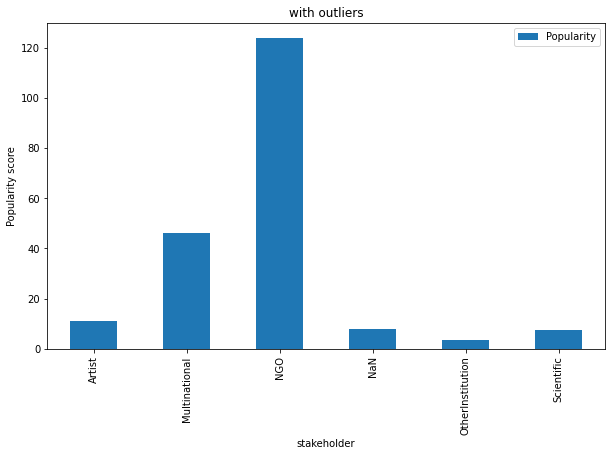

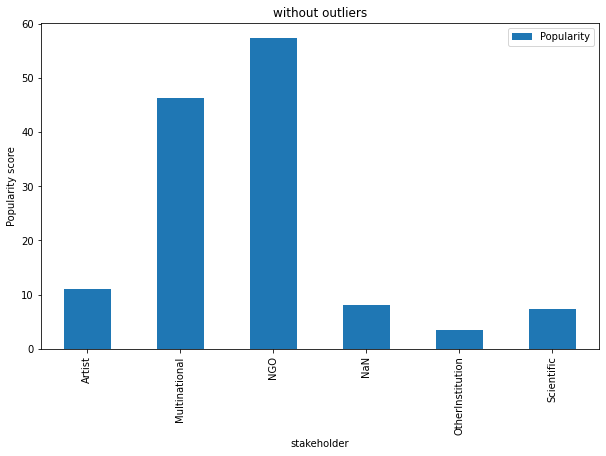

In [14]:
#stakeholder impact in terms of Popularity
diag = user_popularity_df.groupby('stakeholder').sum()
plt.show(diag.plot(kind='bar',figsize=(10, 6),ylabel='Popularity score',title="with outliers"))
exclude_greenpeace = user_popularity_df[user_popularity_df['tweet.user.screen_name']!="Greenpeace"]
diag2 = exclude_greenpeace.groupby('stakeholder').sum()
plt.show(diag2.plot(kind='bar',figsize=(10, 6),ylabel='Popularity score',title="without outliers"))

<AxesSubplot:xlabel='Popularity', ylabel='tweet.user.screen_name'>

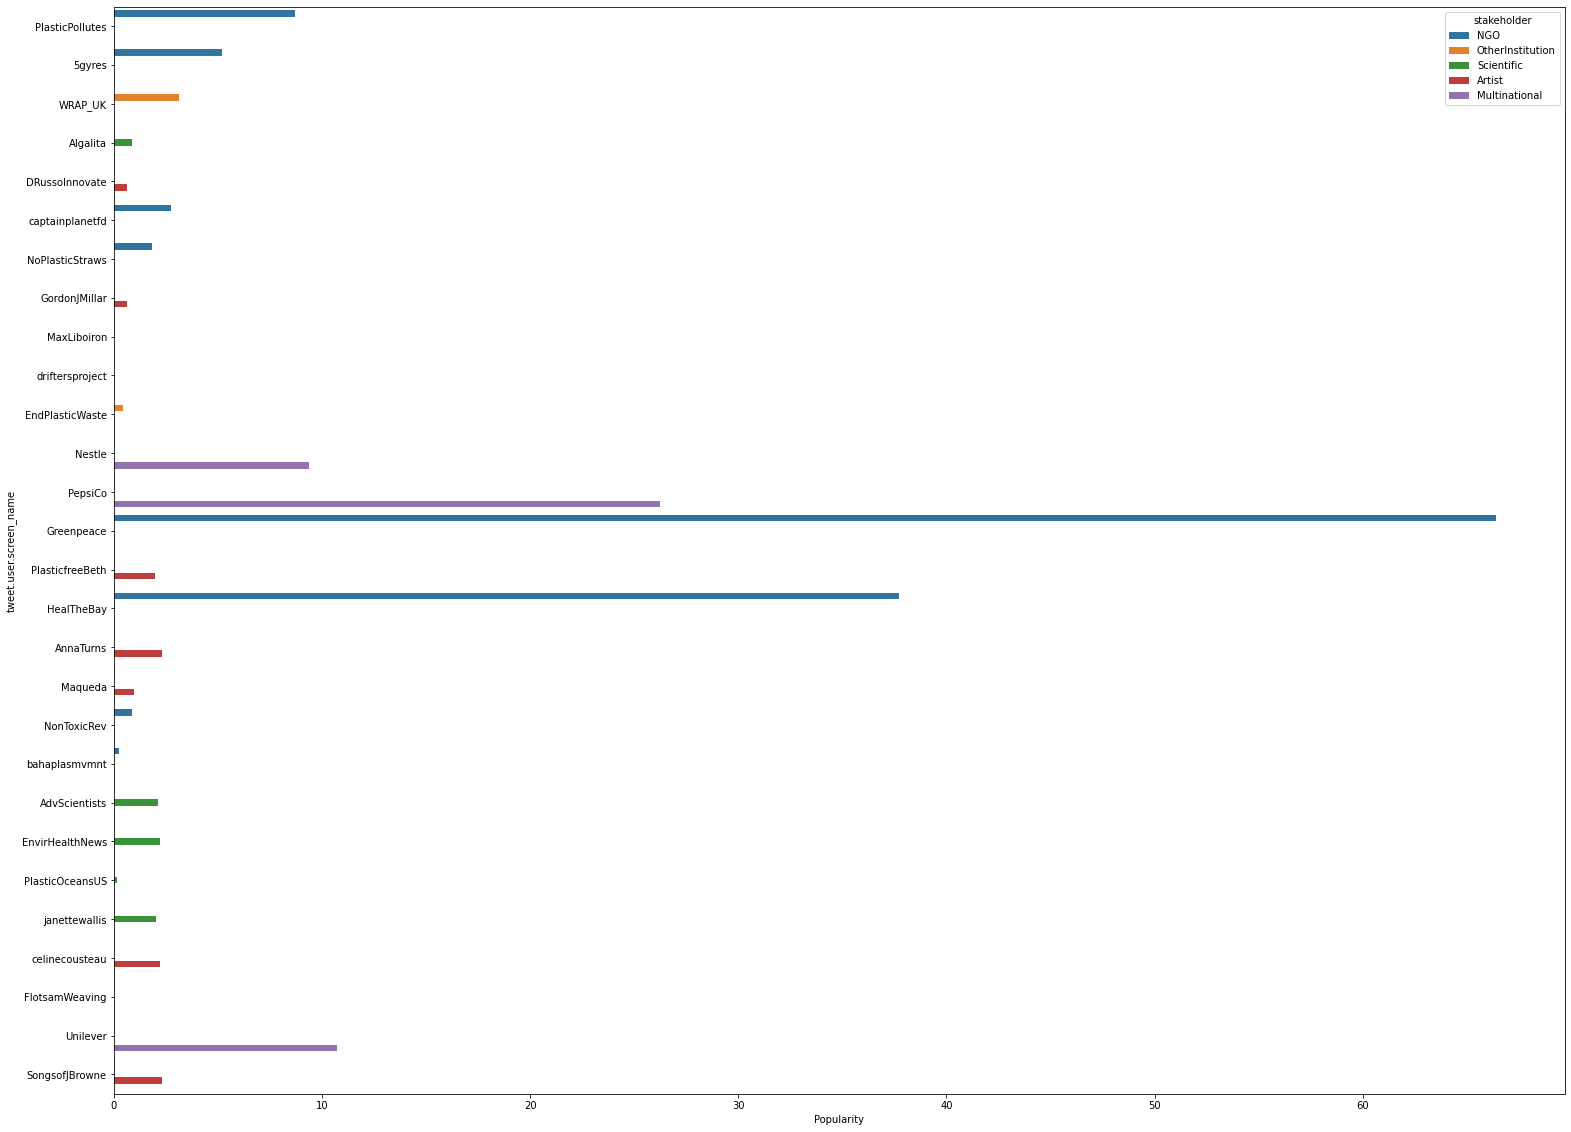

In [15]:
#Users impact in terms of Popularity
plt.figure(figsize=(26,20))
sns.barplot(data=main_df,x="Popularity",y="tweet.user.screen_name",hue="stakeholder")  


+ <b>NGO generally has the upperhand in termns of Popularity. If we remove the user "Greenpeace" who is the one wildly popular user in the dataset, we can find that NGO and Multinational companies are the 2 Stakeholders which has the most popularity. The rest of Artists , Other institutes and Scientists remain to be less popular. If the popularity score is high the more the chances of the users posts appearing in more peoples feeds.

> 3 Most popular NGOs are : Greenpeace, Heal The Bay, Plastic Pollutes
    
> 3 Most popular Multinational Companies are : Pepsico, Nestle, Uniliever
</b>

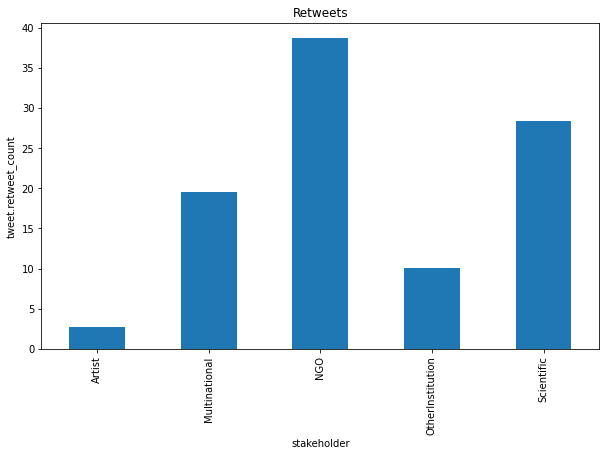

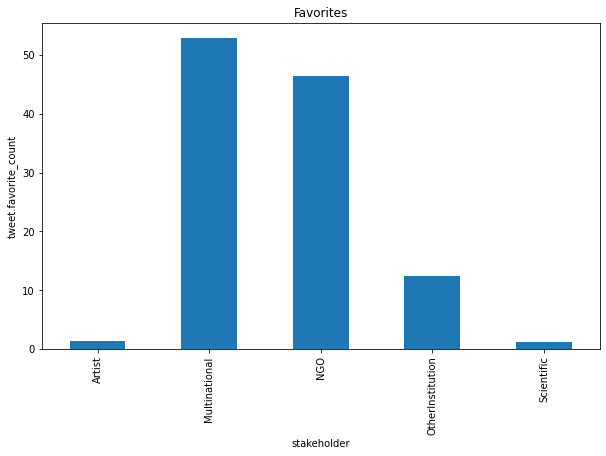

In [16]:
#impact in terms of Tweet performance by each stakeholder
diag_tweet = (main_df.groupby('stakeholder').mean()) # mean - > (tweet performance score / total number of tweets per stakeholder) , This ratio will help us understand tweet performance impact uniformly 
diag_tweet[['tweet.retweet_count','tweet.favorite_count']]
plt.show(diag_tweet['tweet.retweet_count'].plot(kind='bar',figsize=(10, 6),ylabel='tweet.retweet_count',title="Retweets"))
plt.show(diag_tweet['tweet.favorite_count'].plot(kind='bar',figsize=(10, 6),ylabel='tweet.favorite_count',title="Favorites"))

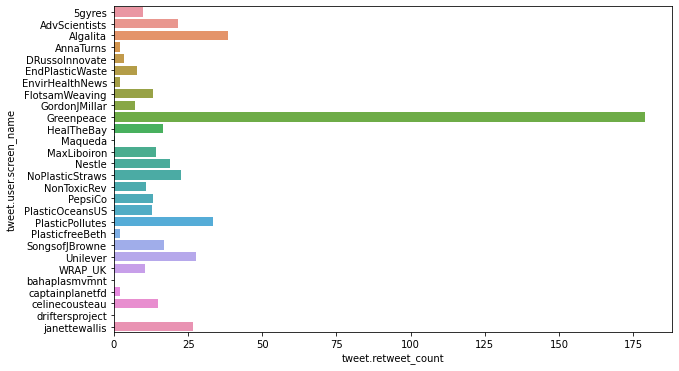

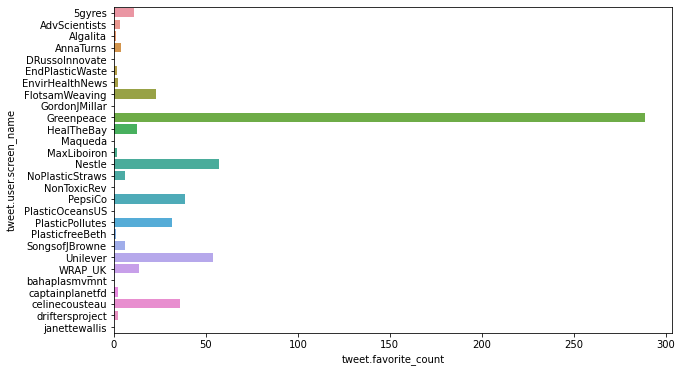

In [17]:
#Users impact in terms of tweet performance
diag_user_tweet = main_df.groupby('tweet.user.screen_name',as_index=False).mean() #we are using mean so that we average out big diffrences in data (eg:plastic pollutes has the highest retweet more than a 1000 but appeared only once while most of its other tweets are below 500)
diag_user_tweet
plt.figure(figsize=(10,6))
plt.show(sns.barplot(data=diag_user_tweet,y="tweet.user.screen_name",x="tweet.retweet_count"))
plt.figure(figsize=(10,6))
plt.show(sns.barplot(data=diag_user_tweet,y="tweet.user.screen_name",x="tweet.favorite_count"))

+ <b>While considering tweet performance per stake holder we decided to consider the numbers as a ratio (total performance per stake holder/count of stakeholder tweets) this is because the number of tweets contributed by each stakeholder is very diffrent (eg:NGO made more tweets than all other stakeholder combined). Upon reviewing the first bar graph visualization here, we can understand that NGO and Scientific community has more retweets per tweet made, while NGO and Multinational companies has the highest favoraites.</b>

> Greenpeace is the user with the most performing tweets which alone is bringing so much value to the NGO stakeholders

> Companies like Nestle and Unilever also maintain considerably good performance throughout

> Algalita is a Scientific stakeholder who has a good record of retweets

> Plastic pollutes is one of the NGO that also does maintain fair performance (upon evaluating more: no of tweets made by this NGO is the highest - 127 tweets)

#### <span style='color:green'>Task 3. Why did you choose your definition of impact for users/groups of users?


<b>summary:</b>

<span style="color:Purple"> We have user parameters like user followers, friends, favorites & statuses. From this we mainly use Followers and Friends to calculate a parameter called Popularity. We are not using user favorites and user statuses because of the unclear nature of twitter algorithm and how it uses these parameters to calculate engagement. A tweets individual parameter is calculated by 2 individual parameters of impact defined by tweet_retweets and tweet_favorites: </span>

> + Popularity impact : (mean followers + mean friends)per user

> + Tweet performance : based on retweet and favorites taken as independent variables

In [18]:
main_df

tweet.created_at  \
0    2019-03-05 00:55:05.000000   
1    2018-10-04 17:01:10.000000   
2    2018-10-04 14:33:54.000000   
3    2018-08-16 21:20:06.000000   
4    2018-03-28 21:35:09.000000   
5    2019-11-15 10:34:38.000000   
6    2019-10-23 13:48:01.000000   
7    2019-10-21 09:46:02.000000   
8    2019-10-16 08:42:00.000000   
9    2019-09-02 09:32:01.000000   
10   2019-08-29 10:16:01.000000   
11   2019-08-28 11:43:01.000000   
12   2019-08-23 08:43:01.000000   
13   2019-08-13 13:52:01.000000   
14   2019-07-18 11:13:01.000000   
15   2019-07-18 09:45:01.000000   
16   2019-07-02 13:12:02.000000   
17   2019-02-20 10:29:41.000000   
18   2019-02-05 14:05:03.000000   
19   2019-02-05 10:01:01.000000   
20   2018-11-19 10:23:54.000000   
21   2018-11-15 17:37:26.000000   
22   2018-09-10 09:25:40.000000   
23   2018-02-27 10:40:26.000000   
24   2018-02-22 19:27:36.000000   
25   2018-11-15 18:29:02.000000   
26   2018-11-05 18:44:59.000000   
27   2018-10-19 17:10:06.000000   
28   2017-06-14 17:05:25.000000   
29   2016-11-04 18:21:28.000000   
30   2016-01-22 18:01:54.000000   
31   2013-05-22 19:56:17.000000   
32   2011-03-16 23:29:08.000000   
33   2018-10-06 11:35:52.000000   
34   2018-10-05 07:01:05.000000   
35   2011-12-23 14:14:59.000000   
36   2019-01-13 13:49:42.000000   
37   2016-12-13 20:48:10.000000   
38   2019-12-27 19:12:43.000000   
39   2019-11-21 23:20:10.000000   
40   2019-11-15 21:02:38.000000   
41   2019-11-15 21:02:26.000000   
42   2019-10-29 14:34:00.000000   
43   2019-03-29 08:05:04.000000   
44   2019-02-04 18:22:07.000000   
45   2018-12-15 22:37:58.000000   
46   2019-12-26 00:35:03.000000   
47   2019-12-23 20:30:11.000000   
48   2019-12-22 14:50:05.000000   
49   2019-12-19 14:15:10.000000   
50   2019-12-17 19:50:37.000000   
51   2019-12-07 00:45:04.000000   
52   2019-12-06 00:55:04.000000   
53   2019-12-02 15:07:06.000000   
54   2019-11-29 18:56:32.000000   
55   2019-11-25 21:55:54.000000   
56   2019-11-22 17:47:53.000000   
57   2019-11-18 20:25:05.000000   
58   2019-11-15 14:59:01.000000   
59   2019-11-14 20:05:08.000000   
60   2019-11-08 01:00:35.000000   
61   2019-11-06 19:30:13.000000   
62   2019-11-05 19:45:11.000000   
63   2019-10-23 18:35:04.000000   
64   2019-10-23 12:02:26.000000   
65   2019-10-19 13:10:05.000000   
66   2019-10-16 23:55:05.000000   
67   2019-09-21 00:05:04.000000   
68   2019-07-23 17:15:25.000000   
69   2019-07-23 15:02:52.000000   
70   2019-07-23 00:26:44.000000   
71   2019-07-04 23:55:03.000000   
72   2019-07-02 00:20:04.000000   
73   2019-06-30 18:02:42.000000   
74   2019-06-08 14:10:07.000000   
75   2019-05-27 00:20:05.000000   
76   2019-05-16 02:15:05.000000   
77   2019-04-27 20:40:06.000000   
78   2019-04-16 18:20:04.000000   
79   2019-04-14 00:05:04.000000   
80   2019-04-07 14:15:04.000000   
81   2019-04-02 22:55:04.000000   
82   2019-02-24 02:05:06.000000   
83   2019-01-16 17:10:43.000000   
84   2018-12-10 16:01:39.000000   
85   2018-11-03 00:00:32.000000   
86   2018-11-01 23:45:04.000000   
87   2018-11-01 14:20:09.000000   
88   2018-10-31 17:05:03.000000   
89   2018-10-16 21:39:39.000000   
90   2018-10-13 21:05:03.000000   
91   2018-10-09 20:45:21.000000   
92   2018-10-09 17:58:09.000000   
93   2018-10-09 15:25:19.000000   
94   2018-10-08 21:30:08.000000   
95   2018-09-21 18:01:28.000000   
96   2018-09-19 20:25:05.000000   
97   2018-09-01 02:32:30.000000   
98   2018-07-30 16:49:54.000000   
99   2018-07-11 20:53:38.000000   
100  2018-03-14 17:38:06.000000   
101  2018-03-06 16:40:35.000000   
102  2017-11-10 15:32:43.000000   
103  2017-10-31 17:57:44.000000   
104  2017-10-24 22:53:30.000000   
105  2019-12-24 19:01:06.000000   
106  2019-12-09 22:25:03.000000   
107  2019-12-07 22:25:07.000000   
108  2019-11-26 12:01:09.000000   
109  2019-11-25 14:10:06.000000   
110  2019-11-19 21:33:06.000000   
111  2019-11-09 16:10:04.000000   
112  2019-11-07 15:01:16.000000   
113  2019-10-25 01:15:03.

#### <span style='color:green'>Task 4. Which hashtags have the most impact?
	- A way of assessing this would be to calculate the impact for each tweet, and then calculate the total impact.

<b>summary:</b>

<span style="color:Purple"> First lets calculate the top tweets in our dataset then lets count the number of ocurence of each hashtags in these top tweets : </span>
> + Top tweets are calculated by first taking average of total popularity,retweet & favorites in the entire dataset and then filtering out every tweets that are above these average measures.

> + From these tweets we count the number of times each hashtag is been used.

> + We found that the top most used Hashtag is #plasticpollutes which is at the top with a count of 39 only because the user plasticpollutes tends to use this hashtag in most of its post. This user is the one with the highest tweet numbers as well.

> + #breakfreefromplastic & #BreakFreeFromPlastic are next with 15 and 14 counts respectively. But intentionally both these hashtags refer to a single topic.

In [19]:
#lets first consider the avg Popularity, Retweet and Favorites score to pick only the tweets that performed above avg in all these aspects of impact.
#NOTE : We will not consider 'Greenpeace' as it is an extreme value
exc_green_pop = user_popularity_df[user_popularity_df['tweet.user.screen_name']!= 'Greenpeace']
avg_pop = exc_green_pop['Popularity'].mean()
exc_green_tweet = main_df[main_df['tweet.user.screen_name']!= 'Greenpeace']
avg_retweet = exc_green_tweet['tweet.retweet_count'].mean()
avg_favorite = exc_green_tweet['tweet.favorite_count'].mean()
print(f'avg popullation : {avg_pop}   avg retweet : {avg_retweet}   avg favorite : {avg_favorite}')

#now we filter out data which is higher than all these 3 values (tweets with good impact provided by Popular users)
top_tweets = main_df[(main_df['Popularity']>avg_pop)&(main_df['tweet.retweet_count']>avg_retweet)&(main_df['tweet.favorite_count']>avg_favorite)]
top_tweets

avg popullation : 4.948532609190066   avg retweet : 17.209411764705884   avg favorite : 15.856470588235295


tweet.created_at  \
0    2019-03-05 00:55:05.000000   
2    2018-10-04 14:33:54.000000   
3    2018-08-16 21:20:06.000000   
54   2019-11-29 18:56:32.000000   
55   2019-11-25 21:55:54.000000   
56   2019-11-22 17:47:53.000000   
57   2019-11-18 20:25:05.000000   
60   2019-11-08 01:00:35.000000   
63   2019-10-23 18:35:04.000000   
64   2019-10-23 12:02:26.000000   
66   2019-10-16 23:55:05.000000   
71   2019-07-04 23:55:03.000000   
72   2019-07-02 00:20:04.000000   
73   2019-06-30 18:02:42.000000   
74   2019-06-08 14:10:07.000000   
75   2019-05-27 00:20:05.000000   
76   2019-05-16 02:15:05.000000   
77   2019-04-27 20:40:06.000000   
80   2019-04-07 14:15:04.000000   
84   2018-12-10 16:01:39.000000   
90   2018-10-13 21:05:03.000000   
92   2018-10-09 17:58:09.000000   
96   2018-09-19 20:25:05.000000   
101  2018-03-06 16:40:35.000000   
105  2019-12-24 19:01:06.000000   
106  2019-12-09 22:25:03.000000   
107  2019-12-07 22:25:07.000000   
108  2019-11-26 12:01:09.000000   
109  2019-11-25 14:10:06.000000   
111  2019-11-09 16:10:04.000000   
112  2019-11-07 15:01:16.000000   
113  2019-10-25 01:15:03.000000   
114  2019-10-23 14:20:00.000000   
115  2019-10-05 20:44:04.000000   
116  2019-10-04 17:05:10.000000   
117  2019-09-08 09:00:26.000000   
118  2019-09-04 22:10:03.000000   
119  2019-09-03 08:01:26.000000   
120  2019-08-27 12:00:42.000000   
121  2019-08-13 03:10:03.000000   
122  2019-08-06 13:00:53.000000   
123  2019-08-01 02:00:14.000000   
160  2018-03-21 12:30:32.000000   
168  2018-01-02 17:20:20.000000   
290  2020-01-07 22:29:38.000000   
291  2020-01-06 18:30:07.000000   
294  2020-01-14 00:45:03.000000   
297  2020-01-04 20:30:08.000000   
312  2018-04-09 14:55:01.000000   
334  2019-09-10 15:12:31.000000   
336  2019-04-11 15:14:49.000000   
337  2019-04-05 09:38:07.000000   
340  2019-12-04 21:13:21.000000   
343  2018-10-24 08:14:30.000000   
344  2018-04-04 09:04:46.000000   
345  2017-04-13 13:19:04.000000   
347  2019-12-06 19:55:11.000000   
353  2019-10-29 18:50:07.000000   
354  2019-10-20 00:30:05.000000   
356  2019-10-14 00:10:04.000000   
357  2019-10-06 13:10:04.000000   
358  2019-10-02 19:15:08.000000   
360  2019-09-24 13:40:05.000000   
366  2019-08-01 19:10:06.000000   
368  2019-07-24 19:30:09.000000   
369  2019-07-20 19:05:09.000000   
370  2019-07-19 18:55:06.000000   
373  2019-07-08 18:55:05.000000   
376  2019-06-17 00:20:05.000000   
377  2019-06-06 16:15:52.000000   
378  2019-05-28 23:50:05.000000   
380  2019-05-22 18:30:18.000000   
382  2019-04-21 18:55:04.000000   
387  2019-02-13 20:05:06.000000   
388  2018-10-25 18:55:06.000000   
390  2020-01-13 14:20:05.000000   
391  2020-01-04 20:30:08.000000   
427  2018-02-01 01:00:48.000000   
428  2018-01-05 17:19:35.000000   
429  2018-01-02 21:00:41.000000   
430  2017-12-28 00:00:27.000000   
432  2017-12-01 03:00:19.000000   
433  2017-11-21 19:40:06.000000   
434  2017-10-28 21:40:03.000000   
435  2017-10-28 16:40:04.000000   

                                                                                                                                                                                                                                                                                                     tweet.full_text  \
0                                                                    The Recycling Myth. “I hear the excuse all the time, ‘I use single-use plastic, but I recycle it, so it’s OK.’ Unfortunately, that is not the truth.” #plasticpollutes #recyclingisnottheanswer https://t.co/yD75iVbd6k https://t.co/ocQbPhjqLN   
2                                                  USEPA report &amp; NEW projection shows plastic waste is rising while #recycling rates drop. Recycling is NOT the answer to #plasticpollution. We need a systems shift away from toxic #plastics https://t.co/47i9YjdxQv #plasticpollutes https://t.co/lEMEj4QECA   
3                                                                   

In [20]:
#now from these filtered tweets lets extract and check which Hashtags appear the most
all_hash_tags = []
for i in top_tweets['hash_tags']:
    if len(i)>0:
        for ele in i:
            all_hash_tags.append(ele)
tag_count_df = pd.DataFrame(all_hash_tags,columns=['HASHTAG']) # create a new dataframe for our hashtags
tag_count_df = tag_count_df.drop_duplicates()
tag_count_df['count'] = tag_count_df['HASHTAG'].apply(lambda x : all_hash_tags.count(x)) #function returns no of count per hashtag
most_appearing_tags = tag_count_df.sort_values('count',ascending=False)#count of all tags
most_appearing_tags[most_appearing_tags['count']>=5] #these are the most frequent tags in our list

HASHTAG  count
0         #plasticpollutes     39
16   #breakfreefromplastic     15
24   #BreakFreeFromPlastic     14
116          #plastickills     12
88        #plasticispoison     10
159            #DidYouKnow      8
90        #circulareconomy      8
160       #RefuseSingleUse      5

+ <b>These are the top most used hashtags in some highly performing tweets made by popular users</b>

> The hashtag #plasticpollutes which appears the highest is only at the top because the user 'Plasticpollutes' who makes the highest amount of tweets, uses this hashtag in most of its posts.

> Generally all other hashtags has appeared between 5 and 15 time with 15 being #breakfreefromplastic

#### <span style='color:green'>Task 5. Explore the NLP emotional analysis
    -How are the scores for different emotions distributed in the dataset?
    -Are some emotions correlated positively or negatively with each other?
</span>


<b>summary:</b>

<span style="color:Purple"> We have explored the data to find relationships in emotions at Step1. From understanding the emotions we have grouped them together for easier understanding and visualization. Here are some insights on how these emotions are presented throughout our dataset : </span>
    
> + We have grouped together ceratain emotions based on their relation with one another to form 3 groups : Positive, Negative and Really_Negative

> + When positive emotions increase Negative and Really Negative tends to decrease. And when Negative Increases Positive decreases but there is also a chance of increase in Really_Negative emotion. There is no instance where any of these scores are uniformly mentioned or have almost equal scores.

> + While Trying to understand how these scores are distributed throughout our Dataset we found that - litely Positive scores from range (0-0.5) exists the most and then in case of highly positive scores, like from range (1-1.5) there is a sharp decrease. However, Negative scores has a decent density in both ranges (0-0.5) and (1-1.5), this explains that strongly Negative and Litely Negative scores are distributed throughout our dataset. We can also conclude that strongly negative scores are higher than strongly positive scores in our dataset. Almost all Really_negative scores exist between range (0-0.25).



C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

<AxesSubplot:xlabel='really_negative_score', ylabel='Density'>

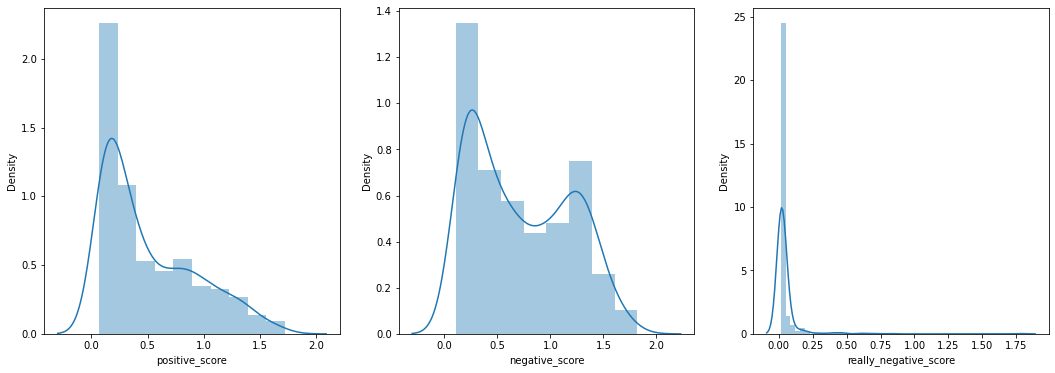

In [22]:
#distribution of emotions presented by all tweets
f, axes = plt.subplots(1, 3,figsize=(18,6))
sns.distplot(main_df['positive_score'],ax=axes[0])
sns.distplot(main_df['negative_score'],ax=axes[1])
sns.distplot(main_df['really_negative_score'],ax=axes[2])
# IGNORE FUTURE WARNINGS FOR NOW (1-3-2022)
#NOTE : y scale is diffrent for all 3 graphs 

+ <b>From the distribution of our emotion scores throughout all the tweets we can easily analyze what patterns of emotions exists in this dataset</b>

> Lite Positive scores esists the most in all the tweets but the intensity of strongly positive scores are decreasing

> Negative scores form a camel distribution, there exist more litely negative emotions and also a good amount of strongly negative emotions from range 1-1.5 .

> Really negative score exist the least and most of them are very mildly toxic.

#### <span style='color:green'>Task 6.	Explore relationship between NLP emotional analysis and impact.
		-do tweets with any certain emotion have more impact?



<b>summary:</b>

<span style="color:Purple"> For this analysis, lets again pick the top tweets we used on the last problem and then visualize the emotions to see how emotions are distributed across most impactful tweets: </span>

> + Most of high impact tweets have Negative emotion surrounding it. Most of these tweets are made by the user 'PlasticPollutes' and secondly 'Greenpeace' which are both NGO's.

> + Only a few positive dominant tweets are found,'Pepsico' and 'Unilever' are some companies whos been able to create such top tweets.

<AxesSubplot:xlabel='tweet.user.screen_name'>

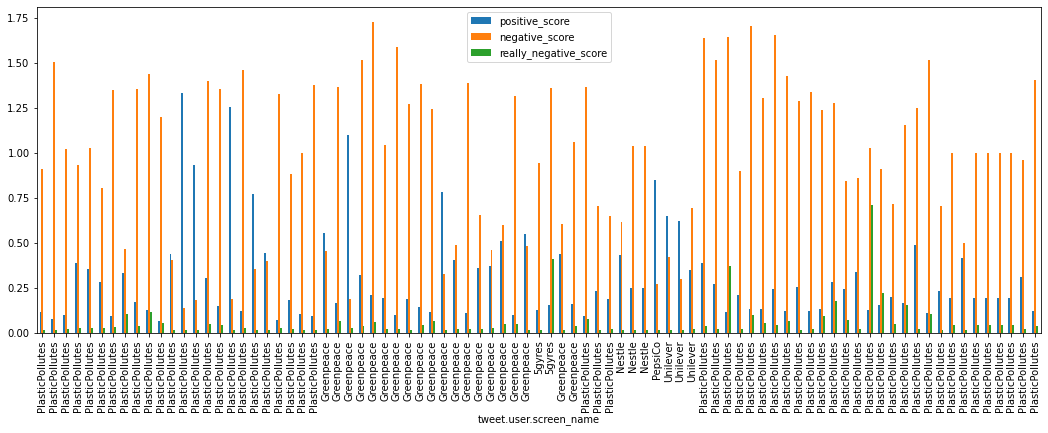

In [23]:
top_tweets.plot(x="tweet.user.screen_name", y=["positive_score", "negative_score", "really_negative_score"], kind="bar",figsize=(18,6))

+ <b> We can see that for most impactful tweets there is an overwhelming amount of negative score attached to it. There is only a few cases were Positive scores has outmatched negative scores. This gives us confirmation that mostl of all tweets with impact has a negative emotion attached to it.</b>

#### <span style='color:green'> Task 7. Which companies are mentioned the most?
		-write a program that looks through hashtags and user mentions and counts occurrences.



summary:

<span style="color:Purple"> All most mentions can be counted from filtering out mentions from all tweet texts, here we can observe that: </span>

> + @PlasticPollutes and @circulareconomy are the users thats been mentioned most with count-12.

> + The Company that is most Mentioned is @amazon with count-8, followed by @Nestle-6, @Unilever-5, @PepsiCo-4 and @CocaCola-4

> + If we consider the mentions such as eg:"@amazon" and "@amazon's" as a mention refering to the same company there is change in the counts of total Mentions. The total mentions per company would be Cocacola-8, PepsiCo-8, Nestle-10, Unilever-5, amazon-9

In [24]:
#we can use same code we used for hashtags
all_user_tags = []
for i in main_df['user_tags']:
    if len(i)>0:
        for ele in i:
            all_user_tags.append(ele)
user_tag_count_df = pd.DataFrame(all_user_tags,columns=['Mention']) # create a new dataframe for our mentions
user_tag_count_df = user_tag_count_df.drop_duplicates()
user_tag_count_df['count'] = user_tag_count_df['Mention'].apply(lambda x : all_user_tags.count(x)) #function returns no of mentions
most_mentioned_users = user_tag_count_df.sort_values('count',ascending=False)#count of all mentions
most_mentioned_users

Mention  count
10       @PlasticPollutes:     12
220       @circulareconomy     12
34         @brkfreeplastic     11
147       @plasticfreebeth     11
167       @PlasticPollutes     11
29                 @amazon      8
341        @beyond_plastic      8
17        @brkfreeplastic:      8
46                 @Nestle      6
47               @Unilever      5
45                @PepsiCo      4
44               @CocaCola      4
98          @implicitweet:      4
53                @Nestle,      4
56                   @MDLZ      4
227      @circulareconomy,      4
192              @EcoEtsy:      4
221       @NewPlasticsEcon      3
238       @plasticpollutes      3
2                 @WRAP_UK      3
65            @ciel_tweets      3
48             @Greenpeace      3
337       @Beyond_Plastic:      3
4             @recycle_now      3
351              @kumulab:      3
27              @Starbucks      3
256         @EcologyCenter      3
387          @ciel_tweets:      3
52              @CocaCola,      3
150           @bewastewise      3
24              @Nespresso      3
105      @LifeWoutPlastic:      3
79                 @Danone      2
342            @TWA2Jenny:      2
63               @EcoWatch      2
333        @Beyond_Plastic      2
331          @in_gredients      2
88                  @Pepsi      2
325                @NatGeo      2
69             @GAIAnoburn      2
319          @CirculateCap      2
317                @Veolia      2
168         @NoPlastixDani      2
157           @MomsRising:      2
148              @algalita      2
146          @diannecavoly      2
344       @BANDAID_SOCIAL:      2
145              @mmitaly:      2
189     @plasticfreebeth's      2
240      @plasticfreebeth:      2
366       @beyond_plastic:      2
181         @DebraLynnDadd      2
30                @GCNewsL      2
31          @GovMikeDeWine      2
356      @PlasticfreeBeth:      2
203              @ecoetsy:      2
66        @EnvirHealthNews      2
60               @PepsiCo,      2
269               @sbbowl.      1
260                @FoEint      1
211           @TreeHugger:      1
267          @jackjohnson:      1
268       @plasticfreejuly      1
216               @susie_c      1
270         @robynpurchia:      1
275           @bestrawsome      1
213            @EarthShare      1
217               @oceana:      1
273              @AquaTru:      1
274               @AquaTru      1
215         @storyofstuff:      1
259              @EIA_News      1
241              @Mr_htcht      1
218            @IssuesOn1:      1
219            @Portantino      1
258       @SahabatAlamMsia      1
229             @Seasaver:      1
255           @BaselAction      1
254              @ecotonID      1
234       @PlasticFreeJuly      1
252            @ToxicsFree      1
235         @andrewalmack:      1
251               @brsmeas      1
236             @ryan7565:      1
249          @lillyspickup      1
247           @MarcBMusic:      1
277           @GiantEagle,      1
243            @MailOnline      1
0             @R_Swannell:      1
315           @TOMRAGroup,      1
279           @jackjohnson      1
339          @PulpWorksInc      1
346       @Beyond_Plastic.      1
348              @KUMUlab:      1
349                    @p…      1
350            @donbribon:      1
352              @gfriend:      1
355              @setjeff:      1
361                @Amazi,      1
362         @in_gredients.      1
363          @esmyjimenez:      1
364            @ecovative:      1
367             @oppgreen:      1
369          @EcoLogic_LLC      1
373       @ChopDawgStudios      1
374           @PitchCrunch      1
375          @accelerators      1
379             @angellist      1
380           @500Startups      1
384          @BrowerCenter      1
389      @Sustainable_EMU:      1
391         @frandrescher:      1
394                 @UNEP:      1
345           @franseegull      1
338       @Beyond_Plastic!      1
280             @BYOBottle      1
334             @BeMed_org      1
281    

+ <b>Out of all Mentions in tweets @plasticPollutes and @circulareconomy has the highest mentions. Further evaluating, out of multi national companies Amazon has the most mentions followed by Nestle,Unilever,PepsiCo,CocaCola and so on</b>

In [25]:
#this code snipet will measure the number of mentions for each diffrent companies picked from all mention variations (eg: @amazon and @amazon's will be counted towwards the total of amazon mention)
company_list = ['@CocaCola','@PepsiCo','@Nestle','@Unilever','@amazon']
c = []
for i in company_list: #this loop is to find similar mentions by checking if most of its string characters match exactly the same (Advanced similarity checking can be done only using external libraries)
    for x in most_mentioned_users['Mention']:
        i_length = int(len(i))
        if x[:int(i_length/1.2)] == i[:int(i_length/1.2)]:
#             print(x," ",i,"\n")
            no =int(most_mentioned_users[most_mentioned_users['Mention']==x]['count'])
#             print(no,"\n------------------------------------------------------------------")
            c.append((x,i,no))
c 

[('@CocaCola', '@CocaCola', 4),
 ('@CocaCola,', '@CocaCola', 3),
 ("@CocaCola's", '@CocaCola', 1),
 ('@PepsiCo', '@PepsiCo', 4),
 ('@Pepsi', '@PepsiCo', 2),
 ('@PepsiCo,', '@PepsiCo', 2),
 ('@Nestle', '@Nestle', 6),
 ('@Nestle,', '@Nestle', 4),
 ('@Unilever', '@Unilever', 5),
 ('@amazon', '@amazon', 8),
 ('@amazon’s', '@amazon', 1)]

+ <b>  So total mentions per company would be Cocacola-8, PepsiCo-8, Nestle-10, Unilever-5, amazon-9

#### <span style='color:green'>Task 8. Pick a company, find the emotional scores of tweets mentioning them. How do the emotions in tweets mentioning them compare to the emotions of the tweets in general?


summary:

<span style="color:Purple"> For this case lets pick Amazon to measure tweet emotion as its been one of the company that's been Mentioned a lot: </span>

> + All Amazon mentioned tweets has an overwhelming measure of Negative emotion attached to it and all these tweets are made by user "PlasticPollutes", which is an NGO.

<AxesSubplot:xlabel='tweet.user.screen_name'>

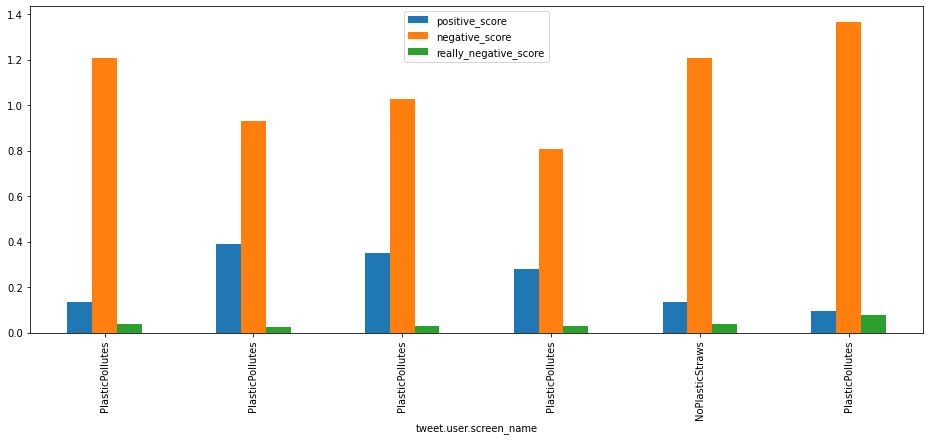

In [26]:
#lets pick amazon to review tweet emotions as its one of the most mentioned Company
def find(x):
    if (("@amazon")or("@amazon’s")) in x:
        return "Found"
f = main_df['user_tags'].apply(find)
f = f[f == 'Found']
f.index #these are index location of tweets where @amazon are mentioned
amazon_tweets = main_df.loc[f.index] #df filtering using the above index
amazon_tweets.plot(x="tweet.user.screen_name", y=["positive_score", "negative_score", "really_negative_score"], kind="bar",figsize=(16,6))

+ <b>The emotion of tweets aimed at Amazon is highly negative. We had evaluated the distribution of emotions and found that there are a good amount of negative emotions that range from 1-1.5, @amazon mentioned tweets will belong in that category.</b>

Text(0.5, 0, 'Emotions title')

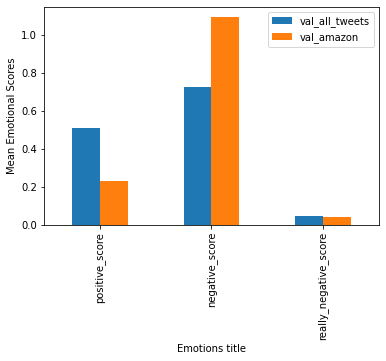

In [67]:
d1 = pd.DataFrame(main_df[main_df.columns[10:-1]].mean(),columns={'val_all_tweets'}).reset_index()
d2 = pd.DataFrame(amazon_tweets[amazon_tweets.columns[10:]].mean(),columns={'val_amazon'}).reset_index()
ax = d1.merge(d2,on='index',how='left').plot(x="index",y=["val_all_tweets","val_amazon"],kind='bar')
ax.set_ylabel("Mean Emotional Scores")
ax.set_xlabel("Emotions title")

* <b>The above is a comparison of mean emotions in amazon tweets with mean emotions of all other tweets in our dataset</b>

#### <span style='color:green'>Task 9. Repeat task 8 for all companies mentioned in the dataset.
    -try using the code you wrote for task 8 and looping it over a list from the companies in question 7




<b>summary:</b>

<span style="color:Purple">Displaying all the mentions emotions at once gives us a clustered visualization that very difficult to evaluate unless made intractive. For our purpose of visualizing all companies only lets hand pick some of the prime companies from various domains, who may be potential clients and evaluate the emotional tweet scores for them</span>

> + We have choosen companies such as Cocacola, Pepsi, Unilever, Nestle who have a lot of dominance in the dataset and the company called amazon for having high mentions. We will also choose starbucks which is an international cafe chain company just to introduce more variation in company domains. (to plot this remove comment and view from code)

> + Upon analysis we found that The overall negative emotion dominance is evident in all 5 out of the 6 companies. Starbucks is the only company that recived more positive tweet mentions than the negatives. Starbucks is also the company that recived the least amount of score even though its positive emotion is higher, this may be beacuse of the low amount of tweet mentioning starbucks.

In [29]:
mean_emotion_per_mention

Mention  Positive_score  Negative_score  \
0             @500Startups        0.117848        1.112966   
1          @7iffanynorton:        0.232734        0.738835   
2                  @Amazi,        1.389076        0.105772   
3                 @Ampacet        0.794708        0.261159   
4                 @AquaTru        1.512225        0.148874   
5                @AquaTru:        1.512225        0.148874   
6         @BANDAID_SOCIAL:        0.752265        0.209466   
7               @BBCRadio4        0.948306        0.186903   
8               @BYOBottle        1.407452        0.146321   
9               @B_resnick        0.084298        1.298955   
10            @BaselAction        0.102235        1.076654   
11              @BeMed_org        0.106680        1.169799   
12         @Beyond_Plastic        0.106680        1.169799   
13        @Beyond_Plastic!        1.063432        0.131014   
14        @Beyond_Plastic.        0.752265        0.209466   
15        @Beyond_Plastic:        1.063432        0.131014   
16               @BobVila:        0.140014        1.233433   
17         @BreatheOcean1:        1.294931        0.147880   
18           @BrowerCenter        0.568928        0.365847   
19             @CECHR_UoD:        0.317370        0.521777   
20                @COrgbon        1.175102        0.166671   
21                @CP_News        0.312508        0.592991   
22        @ChopDawgStudios        0.087838        1.144373   
23           @CifArgentina        1.004868        0.213862   
24           @CirculateCap        0.847689        0.268574   
25          @CleanAirMoms:        0.341750        0.644560   
26               @CocaCola        0.091798        1.347048   
27             @CocaCola's        0.095246        1.353978   
28              @CocaCola,        0.170973        1.354021   
29            @CovestroUS:        0.699040        0.286036   
30        @CreativeConsult        1.073527        0.181870   
31         @CwHumanEcology        0.114311        1.105952   
32       @DIVIDEINCONCORD:        0.263718        0.691283   
33                 @Danone        0.312508        0.592991   
34          @DebraLynnDadd        1.237768        0.193371   
35             @DefraGovUK        1.128912        0.202294   
36           @DowNewsroom:        0.692541        0.432993   
37               @EIA_News        0.102235        1.076654   
38             @EarthShare        1.204892        0.142647   
39               @EcoEtsy:        0.075008        1.208083   
40           @EcoLogic_LLC        0.182896        0.732561   
41               @EcoTales        1.372204        0.171546   
42               @EcoWatch        0.330329        0.566969   
43          @EcologyCenter        0.102235        1.076654   
44         @ElspethMurray:        0.513448        0.322627   
45        @EnvirHealthNews        0.149233        1.317935   
46                 @FoEint        0.102235        1.076654   
47            @GAIAUS_CAN:        0.338265        0.680136   
48             @GAIAnoburn        0.124064        1.460386   
49            @GAIAnoburn:        0.083518        1.208164   
50                @GCNewsL        0.521694        0.534189   
51          @GGGInitiative        0.108340        1.148678   
52            @GiantEagle,        0.436225        0.602035   
53          @GovMikeDeWine        0.521694        0.534189   
54          @GreenDivaMeg:        1.133689        0.166124   
55             @Greenpeace        0.351343        0.431727   
56          @HeloiseHints!        0.572747        0.542654   
57                @Henkel:        0.794708        0.261159   
58              @HtOO_Film        0.161219        1.131135   
59               @HugoSAS:        0.443090        0.442576   
60                @IKEAUSA        0.338265        0.680136   
61                @IVLTeam        0.622249        0.301566   
62        @IndustryEurope:        0.716891        0.265668   
63         @IoniqaCircular        0.622249        0

In [30]:
#using a function lets try returning all emotion scores per tweet mentions 
def pick_emotion(x):
    for i in main_df['tweet.full_text']:
        if x in i:
            a = main_df.loc[main_df[main_df['tweet.full_text']==i].index][["positive_score", "negative_score", "really_negative_score"]]
#           print(x,'\n',str(a['positive_score']).split()[1],'\n',str(a['negative_score']).split()[1],'\n',str(a['really_negative_score']).split()[1],'\n ... \n')
            return (x,i,str(a['positive_score']).split()[1],str(a['negative_score']).split()[1],str(a['really_negative_score']).split()[1])
    print("\n----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
new_series = most_mentioned_users['Mention'].apply(pick_emotion)
mention_emotions = pd.DataFrame([[a, b, c, d, e] for a,b,c,d,e in new_series.values], columns=("Mention Tweet Positive_score Negative_score Really_negative_score").split()) #the dataframe containing all mentions per tweet and their emotions
mean_emotion_per_mention = mention_emotions.groupby('Mention',as_index=False).mean() #avg score of emotions per mention is calculated 
mean_emotion_per_mention

# mean_emotion_per_mention.plot(x="Mention", y=["Positive_score", "Negative_score", "Really_negative_score"], kind="bar",figsize=(30,10)) #bar plot of all mentions (Too clustered)

#from this lets pick only the Multinational companies we Know so we could analyse properly
main_df[main_df['stakeholder']=="Multinational"]['tweet.user.screen_name'].unique()
#However lets include a wider set of: (CocaCola,Nestle,PepsiCo,Starbucks,Unilever,amazon) to visualize and analyze
comp_list = ['@CocaCola','@PepsiCo','@Nestle','@Unilever','@amazon','@Starbucks']


C:\Users\ACER\AppData\Local\Temp\ipykernel_14916\342005351.py:11: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  mean_emotion_per_mention = mention_emotions.groupby('Mention',as_index=False).mean() #avg score of emotions per mention is calculated


@CocaCola   @CocaCola
@CocaCola's   @CocaCola
@CocaCola,   @CocaCola
@Pepsi   @PepsiCo
@PepsiCo   @PepsiCo
@PepsiCo,   @PepsiCo
@Nestle   @Nestle
@Nestle,   @Nestle
@Unilever   @Unilever
@amazon   @amazon
@amazon’s   @amazon
@Starbucks   @Starbucks


Mention  Positive_score  Negative_score  Really_negative_score  \
26     @CocaCola        0.091798        1.347048               0.032599   
27   @CocaCola's        0.095246        1.353978               0.019138   
28    @CocaCola,        0.170973        1.354021               0.038308   
84       @Nestle        0.091798        1.347048               0.032599   
85      @Nestle,        0.170973        1.354021               0.038308   
88        @Pepsi        0.091798        1.347048               0.032599   
89      @PepsiCo        0.091798        1.347048               0.032599   
90     @PepsiCo,        0.126411        1.438736               0.113411   
112   @Starbucks        1.097350        0.211655               0.017556   
123    @Unilever        0.091798        1.347048               0.032599   
134      @amazon        0.133047        1.207206               0.037814   
135    @amazon’s        0.281248        0.805717               0.029150   

        Company  
26    @CocaCola  
27    @CocaCola  
28    @CocaCola  
84      @Nestle  
85      @Nestle  
88     @PepsiCo  
89     @PepsiCo  
90     @PepsiCo  
112  @Starbucks  
123   @Unilever  
134     @amazon  
135     @amazon

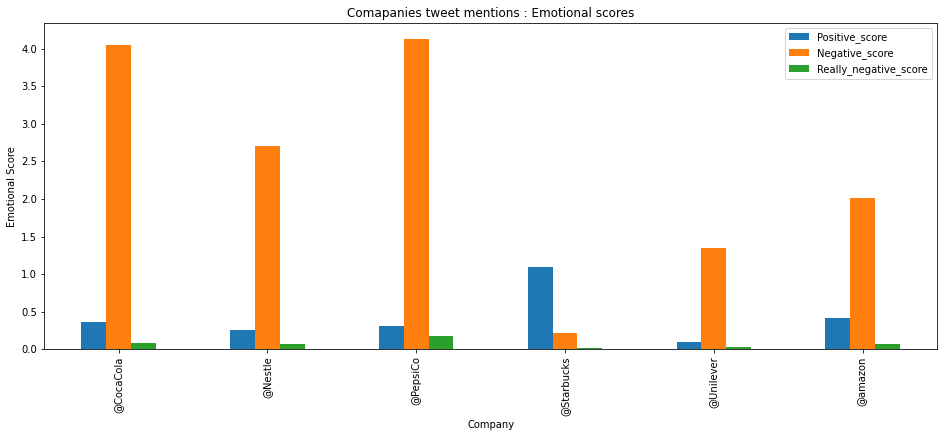

In [31]:
#this program is to find similar mentions : (eg- @Nestle can also be mentioned as @Nestle,)
new_comp_list = []
companies = []
for i in comp_list: #this loop is to find similar mentions by checking if most of its string characters match exactly the same (Advanced similarity checking can be done only using external libraries)
    for x in mean_emotion_per_mention['Mention']:
        i_length = int(len(i))
        if x[:int(i_length/1.2)] == i[:int(i_length/1.2)]:
            print(x," ",i)
            new_comp_list.append(x)
            companies.append(i)
new_comp_list # all similar mentions found on bases of companies 
companies_emotion_df = mean_emotion_per_mention[mean_emotion_per_mention['Mention'].isin(new_comp_list)] 
companies_emotion_df = companies_emotion_df.sort_values(by="Mention")
companies_emotion_df = companies_emotion_df.assign(Company = sorted(companies)) #dataframe with all similar mentions emotions
companies_emotion_df.groupby('Company',as_index=False).sum().plot(x="Company", y=["Positive_score", "Negative_score", "Really_negative_score"], kind="bar",figsize=(16,6), ylabel="Emotional Score",title="Comapanies tweet mentions : Emotional scores") #summing up and visualizing all emotional scores mentioning same company in diffrent mentions
companies_emotion_df

+ <b>The emotional scores associated with most of the companies point to a higher negative ratio compaired with the positive. CocaCola and PepsiCo are 2 companies that has a really high negative emotion score picked from all Tweets mentioning them. However, Starbucks remains to be the only company that has a higher positive emotional score when compaired with its negatives</b>

In [32]:
#lets look at why starbucks has a positive emotion dominance
index_list=[]
for i in main_df['tweet.full_text']:
    if ("@Starbuck") in i:
        index_list.append(main_df[main_df['tweet.full_text']==i].index[0])
pd.Series(index_list)
main_df.loc[index_list]

tweet.created_at  \
45   2018-12-15 22:37:58.000000   
158  2018-03-21 15:15:11.000000   
160  2018-03-21 12:30:32.000000   

                                                                                                                                                                                                                                                                                           tweet.full_text  \
45                     Whether it’s a @pepsi, a @MountainDew or a @Starbucks Doubleshot, if it comes in an aluminum can, it’s recyclable! Check out our latest campaign with @RECYPartnership to help America recycle more cans (and bottles!): https://t.co/2w5ylPZNik #recycling https://t.co/8xapNPElDi   
158  @Starbucks serves 4 BILLION+ plastic-lined cups, lids &amp; straws each year, most aren't recyclable. Demand they address #StarbucksTrash TODAY at the shareholder meeting at 10am! 👉 https://t.co/qId3m3XNr0 #breakfreefromplastic #sneakystyrene Check our FB for Live vid! https://t.co/oQJS1n10LH   
160                                                                                                 Guess what? It's 2018 and your @Starbucks coffee is probably not recycled. Help tell the coffee giant to change: https://t.co/hC6BN6LRrp #starbuckstrash #breakfreefromplastic https://t.co/jHGeEtyzfE   

    tweet.user.screen_name  tweet.retweet_count  tweet.favorite_count  \
45                 PepsiCo                 10.0                  34.0   
158                 5gyres                  0.0                   0.0   
160                 5gyres                 23.0                  32.0   

    tweet.lang    stakeholder  Popularity  \
45          en  Multinational    26.24178   
158         en            NGO     5.16907   
160         en            NGO     5.16907   

                                                    hash_tags  \
45                                               [#recycling]   
158  [#StarbucksTrash, #breakfreefromplastic, #sneakystyrene]   
160                  [#starbuckstrash, #breakfreefromplastic]   

                                                 user_tags  positive_score  \
45   [@pepsi,, @MountainDew, @Starbucks, @RECYPartnership]        1.097350   
158                                           [@Starbucks]        0.395868   
160                                           [@Starbucks]        0.127380   

     negative_score  really_negative_score  
45         0.211655               0.017556  
158        0.713620               0.016096  
160        0.944622               0.016880

+ <b> Starbucks was never targetted by NGO giants and was mentioned by PepsiCo whos a very popular user regarding a highly Positive tweet. This is why starbucks mentioned tweet score was positive dominant. 

#### <span style='color:green'>Task 10.	Pick a company that are being negatively mentioned in tweets. Write out a plan for how you would retain them as a client for the company you are working with. 




<b>summary:</b>

<span style="color:Purple">The company PepsiCo has been mentioned 8 times in tweets and has one of the highest negative emotion score for these tweets. Mostly targetted by the NGO - "PlasticPollutes" and even mentioned once by the Big player "Greenpeace" with one of the most impactful tweeets, PepsiCo has been under heavy criticism. After reviewing the tweets lets map out a plan that may retain PepsiCo as one of our valuable client</span>

<b><u>What Pepsico wants?
    
> + Most mentions indicate PepsiCo as one of the top polluters with other competing companies. What would be ideal for PepsiCo is to break free from this top tier of polluters.

> + Adapting towards a better business model leaning onto a circular economy is vital to maintain public image. More ideas to promote recycling and being the first company to do implement proper strategies will put PepsiCo a step ahead of the competition. (eg: For every 10 pepsi bottle returned get a new pepsi bottle for free)
    
<b><u>What can our Company do?
    
> + Its high time the company moved from purely manufacturing plastic towards a hybrid manufacturing and recycling business.
    
> + Invest more in recycling plastic and labeling them as recycled so that public preception of the brand that buys plastic from us increases.
    
> + Strategize cost cutting in our recycling units at the beginning so that brands will find it easy to adapt towards moving to recycled plastic. 

In [33]:
#lets look at all Tweets that tagged PepsiCo
index_list=[]
for i in main_df['tweet.full_text']:
    if ("@Pepsi"or"@PepsiCo"or"@PepsiCo,") in i:
        index_list.append(main_df[main_df['tweet.full_text']==i].index[0])
pd.Series(index_list)
main_df.loc[index_list]

tweet.created_at  \
57   2019-11-18 20:25:05.000000   
63   2019-10-23 18:35:04.000000   
64   2019-10-23 12:02:26.000000   
87   2018-11-01 14:20:09.000000   
89   2018-10-16 21:39:39.000000   
91   2018-10-09 20:45:21.000000   
114  2019-10-23 14:20:00.000000   
131  2019-07-09 20:22:40.000000   

                                                                                                                                                                                                                                                                                 tweet.full_text  \
57                                                 Who are the world's top ten marine plastic polluters? @brkfreeplastic (hint: many are the same as last year: @CocaCola @PepsiCo @Nestle @Unilever ...) #plasticpollutes #breakfreefromplastic https://t.co/TbqRU4OZs8 https://t.co/Xl8F26V2JA   
63       BREAKING: @CocaCola, @Nestle, @PepsiCo , @Unilever and @MDLZ are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable. Read the full @brkfreeplastic  #BrandAudit2019 report: https://t.co/aOvIfmi4vN #breakfreefromplastic https://t.co/SNB8dXl8Os   
64                                               BREAKING: @cocacola, @Nestle, @PepsiCo, @MDLZ and @Unilever are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable. #BrandAudit2019 #BreakFreeFromPlastic https://t.co/kufQUxVEV7 https://t.co/0N0A8Bl6HV   
87                                                                                                      @CocaCola @Pepsi @Nestle your throwaway business model drives plastic pollution! It’s time for you to set ambitious goals to reduce plastics immediately #BreakFreeFromPlastic #OurOcean   
89                                                                               @Pepsi to launch range of 100% recycled plastic packaging by 2020 after named by @Greenpeace as one of largest corporate polluters in the world. #plasticpollutes #breakfreefromplastic https://t.co/zaAP6trqWe   
91                                                                                                                             .@CocaCola @PepsiCo &amp; @Nestle found to be worst plastic polluters worldwide in global cleanups and brand audits #breakfreefromplastic https://t.co/JRR8A92o3y   
114  BREAKING: @CocaCola, @Nestle, @PepsiCo, @MDLZ and @Unilever are the top 5 corporate plastic polluters of 2019. It's time for them to be held accountable.\n\nRead the full @brkfreeplastic #BrandAudit2019 report: https://t.co/7ZWDWuo8iH\n\n#BreakFreeFromPlastic https://t.co/CXaTp53YcR   
131     We must address the problem of plastic pollution at source. @CocaCola, @Nestle, @PepsiCo lead the pack among the top corporate plastic polluters. This Plastic Free July, I commit to #BreakFreeFromPlastic by holding corporations accountable. https://t.co/KpPCA8QWC1 @brkfreeplastic   

    tweet.user.screen_name  tweet.retweet_count  tweet.favorite_count  \
57         PlasticPollutes                 21.0                  23.0   
63         PlasticPollutes                 45.0                  49.0   
64         PlasticPollutes                 35.0                  61.0   
87         PlasticPollutes                  0.0                   0.0   
89         PlasticPollutes                  0.0                   0.0   
91         PlasticPollutes                 13.0                  15.0   
114             Greenpeace                180.0                 247.0   
131                 5gyres                 11.0                  14.0   

    tweet.lang stakeholder  Popularity  \
57          en         NGO    8.687245   
63          en         NGO    8.687245   
64          en         NGO    8.687245   
87          en         NGO    8.687245   
89          en         NGO    8.687245   
91          en         NGO    8.687245   
114         en         NGO   66.389620   
131         en         NGO    5.169070   

                                 

# Insights

* Greenpeace who is an NGO is the most impactfull User in the Dataset with the most popularity score and tweet performance.
* NGO's are ones who generally target multinational companies and most of its tweet have high negative emotion.
* Negative emotions are dominant in most of the top most impactful tweets.
* PlasticPollutes is a NGO user who tweets the most and is also responsible for some of the most impactful tweets.
* #breakfreefromplastic is the most impactful hashtag found in most top performing tweets.(not considering #PlasticPollutes that comes from only one user every time)
* #PlasticPollutes hash tag and @PlasticPollutes mention are at the top of both total hashtag and total mention counts. This is evident as this user is found to be the most active and engaging user in our dataset.
* Companies that are mentioned most include: Cocacola, PepsiCo, Amazon, Unilever and Nestle. All these multinational companies are targeted mostly by NGO with tweets which includes a higher Negative emotion. 
* By reviewing top tweets we understand that the public preception will not be in favour of the companies and adpating to Recycling and considering Environmental impact is a crutial topic to put attention into.

[Text(0, 0.5, 'No of tweets'),
 Text(0.5, 1.0, 'No of Plastic pollution tweets made over the years')]

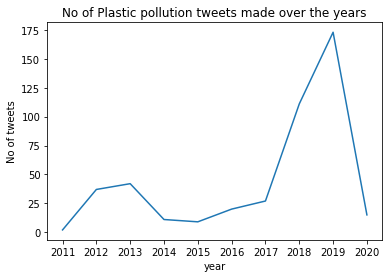

In [34]:
main_df['year'] = main_df['tweet.created_at'].apply(lambda i:i[0:4])
a = sns.lineplot(data = main_df.groupby('year').count()['tweet.full_text'])
a.set(ylabel = "No of tweets", title ='No of Plastic pollution tweets made over the years')

* The volume of tweets made picked up from the year 2017 and was at record high during 2019. The public awairness of plastic pollution was the core agenda for most NGO's at that time and this became a hot topic. By year 2020 the no of tweets made took a huge fall, this may be because of the impact of Covid19 pandemic that grabbed worlds attention elsewhere. However This will only act as a short buffer for companies as the topic will pick up heat sooner or later.

# Limitations

1) The overall amount of data we recived is low. Inorder to make statistical assumptions or find strong co-relations we should have more data. Preferably BigData considering context of twitter dataset.

In [35]:
main_df.count() #we only have 447 data

tweet.created_at          447
tweet.full_text           447
tweet.user.screen_name    447
tweet.retweet_count       447
tweet.favorite_count      447
tweet.lang                447
stakeholder               440
Popularity                447
hash_tags                 447
user_tags                 447
positive_score            447
negative_score            447
really_negative_score     447
year                      447
dtype: int64

2) Twitter tweets can contain 28 languages .Tweet lang is a important parameter that could help us estimate impact country/region wise however, the number of variations on this parameter is very limitted to be considerd useful.

In [36]:
ConversationsLean.groupby('tweet.lang').count() #only 2 languages: english and danish with only 1 row for danish

Unnamed: 0  tweet.created_at  tweet.id  tweet.full_text  \
tweet.lang                                                            
da                   1                 1         1                1   
en                 446               446       446              446   

            tweet.entities  tweet.user.id  tweet.user.screen_name  \
tweet.lang                                                          
da                       1              1                       1   
en                     446            446                     446   

            tweet.user.followers_count  tweet.user.friends_count  \
tweet.lang                                                         
da                                   1                         1   
en                                 446                       446   

            tweet.user.favourites_count  tweet.user.statuses_count  \
tweet.lang                                                           
da                                    1                          1   
en                                  446                        446   

            tweet.retweet_count  tweet.favorite_count  tweet.favorited  \
tweet.lang                                                               
da                            1                     1                1   
en                          446                   446              446   

            tweet.retweeted  fetchedAt  tweet.full_text_clean  anger  fear  \
tweet.lang                                                                   
da                        1          1                      1      1     1   
en                      446        446                    446    446   446   

            joy  love  sadness  trust  identity_hate  insult  obscene  \
tweet.lang                                                              
da            1     1        1      1              1       1        1   
en          446   446      446    446            446     446      446   

            severe_toxic  threat  toxic  stakeholder  
tweet.lang                                            
da                     1       1      1            1  
en                   446     446    446          439

3) More details on Dataset reqired. During some cleaning process i happened to find duplicates of data. Since its precived that tweet.id should be unique for all tweets, its not supposed to be repeated. However, only the author or a discription about the columns can confirm on this. So we havent removed duplicates we found from this study.

In [47]:
#CHECKING DATA FOR DUPLICATES
ConversationsLean[ConversationsLean['tweet.id'].duplicated()] #drop_duplicates can be used to remove these duplicated rows
#there happens to be 15 duplicates in our dataset

Unnamed: 0            tweet.created_at      tweet.id  \
156         110  2018-03-28 21:35:09.000000  9.791097e+17   
307         261  2019-01-13 13:49:42.000000  1.084447e+18   
313           2  2019-08-28 11:43:01.000000  1.166678e+18   
314           3  2019-08-23 08:43:01.000000  1.164820e+18   
316           5  2019-08-13 13:52:01.000000  1.161274e+18   
321          10  2018-01-23 12:32:01.000000  9.557802e+17   
323          12  2018-01-11 14:12:03.000000  9.514567e+17   
324          13  2018-01-11 12:19:01.000000  9.514282e+17   
325          14  2018-01-11 12:12:03.000000  9.514265e+17   
326          15  2018-01-11 11:55:08.000000  9.514222e+17   
327          16  2018-01-11 11:16:27.000000  9.514125e+17   
328          17  2018-01-11 10:59:25.000000  9.514082e+17   
329          18  2018-01-11 10:49:06.000000  9.514056e+17   
339          28  2019-03-29 08:05:04.000000  1.111540e+18   
391          45  2020-01-04 20:30:08.000000  1.213558e+18   

                                                                                                                                                                                                                                                                                                tweet.full_text  \
156                                                                                                                                                                  Is it time to remake recycling? Listen to the story to find out more.  #recyclingisnotenough #breakfreefromplastic https://t.co/0EYuBWulSr   
307                                                                                                                                                              RT @brkfreeplastic: Did you know Malaysia became the top destination for U.S. plastic waste in 2018?\n\n#breakfreefromplastic #recyclingisnot…   
313                                                                                                                               Funding available for projects collecting &amp; recycling non-household business waste   https://t.co/PR7bBefCyX #recycling #circulareconomy #funding https://t.co/RgKMFCch1i   
314                                                                                                                               Funding available for projects collecting &amp; recycling non-household business waste   https://t.co/PR7bBdY1an #recycling #circulareconomy #funding https://t.co/8q1OmKFaJz   
316                                                                                                                               Funding available for projects collecting &amp; recycling non-household business waste   https://t.co/PR7bBefCyX #recycling #circulareconomy #funding https://t.co/MZ7HjqRIo3   
321                                                                       We want to eliminate unnecessary &amp; problematic plastic packaging. Find out more about what we’re working towards with @circulareconomy @NewPlasticsEcon #circulareconomy #NewPlasticsEconomy #plasticfree https://t.co/ovMgNr5PSQ   
323                                                                                            We want to impassion and enable citizens to play their part in reducing plastic packaging waste and litter @circulareconomy #circulareconomy #25YEP #plasticfree https://t.co/SlpAosiqUQ https://t.co/tygrGsrtVI   
324                                                                   We want to increase recycled content in plastic packaging to drive demand for recycled material. This is what we’re doing about it https://t.co/SlpAosiqUQ @circulareconomy #circulareconomy  #25YEP #plasticfree https://t.co/hFUL2gfznz   
325                                                                                                          We want to ramp up recycling collections of plastic packaging. Find out more about our plan: https://t.co/SlpAosiqUQ @circulareconomy #circulareconomy #25YE